### _EXACTSPACE DATA SCIENCE INTERNSHIP ASSIGNMENT_
## __Part 1: Machine Data Analysis (Timeseries)__

---

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

---

### 1. Data Preparation & Exploratory Analysis

In [2]:
df = pd.read_excel("data.xlsx")
df.head()

time Cyclone_Inlet_Gas_Temp Cyclone_Material_Temp  \
0 2017-01-01 00:00:00                 867.63                910.42   
1 2017-01-01 00:05:00                 879.23                918.14   
2 2017-01-01 00:10:00                 875.67                924.18   
3 2017-01-01 00:15:00                 875.28                923.15   
4 2017-01-01 00:20:00                 891.66                934.26   

  Cyclone_Outlet_Gas_draft Cyclone_cone_draft Cyclone_Gas_Outlet_Temp  \
0                  -189.54            -186.04                  852.13   
1                  -184.33             -182.1                  862.53   
2                  -181.26            -166.47                  866.06   
3                  -179.15            -174.83                  865.85   
4                  -178.32            -173.72                  876.06   

  Cyclone_Inlet_Draft  
0              -145.9  
1             -149.76  
2             -145.01  
3             -142.82  
4             -143.39

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


We need to convert the data types of all features aprat from time to numeric.

In [4]:
for col in df.columns:
    if df[col].dtype == 'object' and df[col] is not "time":
        df[col] = pd.to_numeric(df[col], errors = 'coerce')

df.head()

time  Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
0 2017-01-01 00:00:00                  867.63                 910.42   
1 2017-01-01 00:05:00                  879.23                 918.14   
2 2017-01-01 00:10:00                  875.67                 924.18   
3 2017-01-01 00:15:00                  875.28                 923.15   
4 2017-01-01 00:20:00                  891.66                 934.26   

   Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  Cyclone_Gas_Outlet_Temp  \
0                   -189.54             -186.04                   852.13   
1                   -184.33             -182.10                   862.53   
2                   -181.26             -166.47                   866.06   
3                   -179.15             -174.83                   865.85   
4                   -178.32             -173.72                   876.06   

   Cyclone_Inlet_Draft  
0              -145.90  
1              -149.76  
2              -145.01  
3              -142.82  
4              -143.39

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    376399 non-null  float64       
 2   Cyclone_Material_Temp     376128 non-null  float64       
 3   Cyclone_Outlet_Gas_draft  376398 non-null  float64       
 4   Cyclone_cone_draft        376399 non-null  float64       
 5   Cyclone_Gas_Outlet_Temp   376398 non-null  float64       
 6   Cyclone_Inlet_Draft       376397 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.2 MB


>##### __1.1 Check for missing values__

In [6]:
df.isna().sum()

time                           0
Cyclone_Inlet_Gas_Temp      1320
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
dtype: int64

In [7]:
df.describe()

time  Cyclone_Inlet_Gas_Temp  \
count                      377719           376399.000000   
mean   2018-10-20 02:10:21.647840              727.348549   
min           2017-01-01 00:00:00                0.000000   
25%           2017-11-24 21:07:30              856.270000   
50%           2018-10-19 18:10:00              882.380000   
75%           2019-09-13 15:12:30              901.110000   
max           2020-08-07 12:15:00             1157.630000   
std                           NaN              328.664814   

       Cyclone_Material_Temp  Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  \
count          376128.000000             376398.000000       376399.000000   
mean              750.830483               -177.820685         -164.572619   
min              -185.000000               -456.660000         -459.310000   
25%               867.667500               -247.190000         -226.770000   
50%               913.360000               -215.260000         -198.560000   
75%               943.660000               -170.130000         -143.640000   
max              1375.000000                 40.270000          488.860000   
std               350.921068                 99.147236           90.103023   

       Cyclone_Gas_Outlet_Temp  Cyclone_Inlet_Draft  
count            376398.000000        376397.000000  
mean                715.759972          -141.302857  
min                  13.790000          -396.370000  
25%                 801.960000          -193.510000  
50%                 871.525000          -169.460000  
75%                 899.300000          -136.290000  
max                1375.000000            41.640000  
std                 325.346446            77.615576

My idea was to fill all the null values with the mean, provided that there isn't much variance for the feature. From the above output it is clear that there exists a heavy amount of variance. Moreover, dropping the nulls won't be helpful either as this would completely disrupt the time series data as well as the strict 5-minute indexing criteria. The next best bet is to use forward filling.

In [8]:
df_temp = df.copy() # for comparing variation after forward fill

In [9]:
df = df.fillna(method = "ffill")
df.isna().sum()
if len(df) - len(df_temp) != 0:
    print("Some data samples have been dropped! Carefully check previous steps again.")
else:
    print("All clear!")

All clear!


We can also check the difference between the data before and after applying forward filling to check if there is a huge difference.

In [10]:
df.describe() - df_temp.describe()

time  Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
count                0             1320.000000            1591.000000   
mean   0 days 00:00:00               -1.298574              -1.404495   
min    0 days 00:00:00                0.000000               0.000000   
25%    0 days 00:00:00               -0.370000              -0.587500   
50%    0 days 00:00:00               -0.060000              -0.130000   
75%    0 days 00:00:00               -0.010000              -0.065000   
max    0 days 00:00:00                0.000000               0.000000   
std                NaN                1.089456               1.194657   

       Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  Cyclone_Gas_Outlet_Temp  \
count               1321.000000         1320.000000              1321.000000   
mean                   0.362569            0.315049                -1.270224   
min                    0.000000            0.000000                 0.000000   
25%                    0.040000            0.050000                -2.680000   
50%                    0.180000            0.130000                -0.125000   
75%                    0.895000            1.200000                -0.060000   
max                    0.000000            0.000000                 0.000000   
std                    0.233049            0.206107                 1.040391   

       Cyclone_Inlet_Draft  
count          1322.000000  
mean              0.279743  
min               0.000000  
25%               0.060000  
50%               0.100000  
75%               0.780000  
max               0.000000  
std               0.168133

Seemingly less variation exists before and after applying forward filling. 

>##### __1.2 Ensuring strict 5-minute indexing__

First we can check if the time difference between the first and second data sample is 5 minutes or not.

In [11]:
print(df['time'].iloc[1] - df['time'].iloc[0])

0 days 00:05:00


It is! Now we can save that into a variable and loop over the entire set of samples to check if at any point, the time difference is not 5 minutes.

In [12]:
def time_diff_check(df):

    time_diff = df['time'].iloc[1] - df['time'].iloc[0]

    for i in range(len(df['time']) - 1):
        if (df['time'].iloc[i + 1] - df['time'].iloc[i]) != time_diff:
            print("Non 5-minute index found!")
            print(f"{df['time'].iloc[i]} at index {i} & {df['time'].iloc[i + 1]} at index {i + 1}")
            print(f"Time difference: {df['time'].iloc[i + 1] - df['time'].iloc[i]}")
            print()
    print("Check complete!")

time_diff_check(df)

Non 5-minute index found!
2017-12-31 00:00:00 at index 104832 & 2018-01-01 00:00:00 at index 104833
Time difference: 1 days 00:00:00

Non 5-minute index found!
2018-12-31 00:00:00 at index 209665 & 2019-01-01 00:00:00 at index 209666
Time difference: 1 days 00:00:00

Non 5-minute index found!
2019-12-31 00:00:00 at index 314498 & 2020-01-01 00:00:00 at index 314499
Time difference: 1 days 00:00:00

Check complete!


We can infer that these are basically records at the same time, but right before end of the year and right after start of the next year. The difference here will show 1 full day. We don't want that. So we fix this using `date_range` function from pandas.

In [13]:
clean_time = pd.date_range(start = df['time'].iloc[0], periods = len(df), freq = "5T") # 5 minutes
df['time'] = clean_time

In [14]:
time_diff_check(df)

Check complete!


Strict 5-minute indexing ensured!

>##### __1.3 Outlier analysis & handling__

We will use the classic IQR method to look for outliers.

In [15]:
def iqr_outliers(df):
    outliers = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].tolist()
    for col in outliers:
        print(f"Number of outliers in {col}: {len(outliers[col])}")
        
iqr_outliers(df)

Number of outliers in time: 0
Number of outliers in Cyclone_Inlet_Gas_Temp: 85816
Number of outliers in Cyclone_Material_Temp: 79776
Number of outliers in Cyclone_Outlet_Gas_draft: 82014
Number of outliers in Cyclone_cone_draft: 75350
Number of outliers in Cyclone_Gas_Outlet_Temp: 80770
Number of outliers in Cyclone_Inlet_Draft: 82481


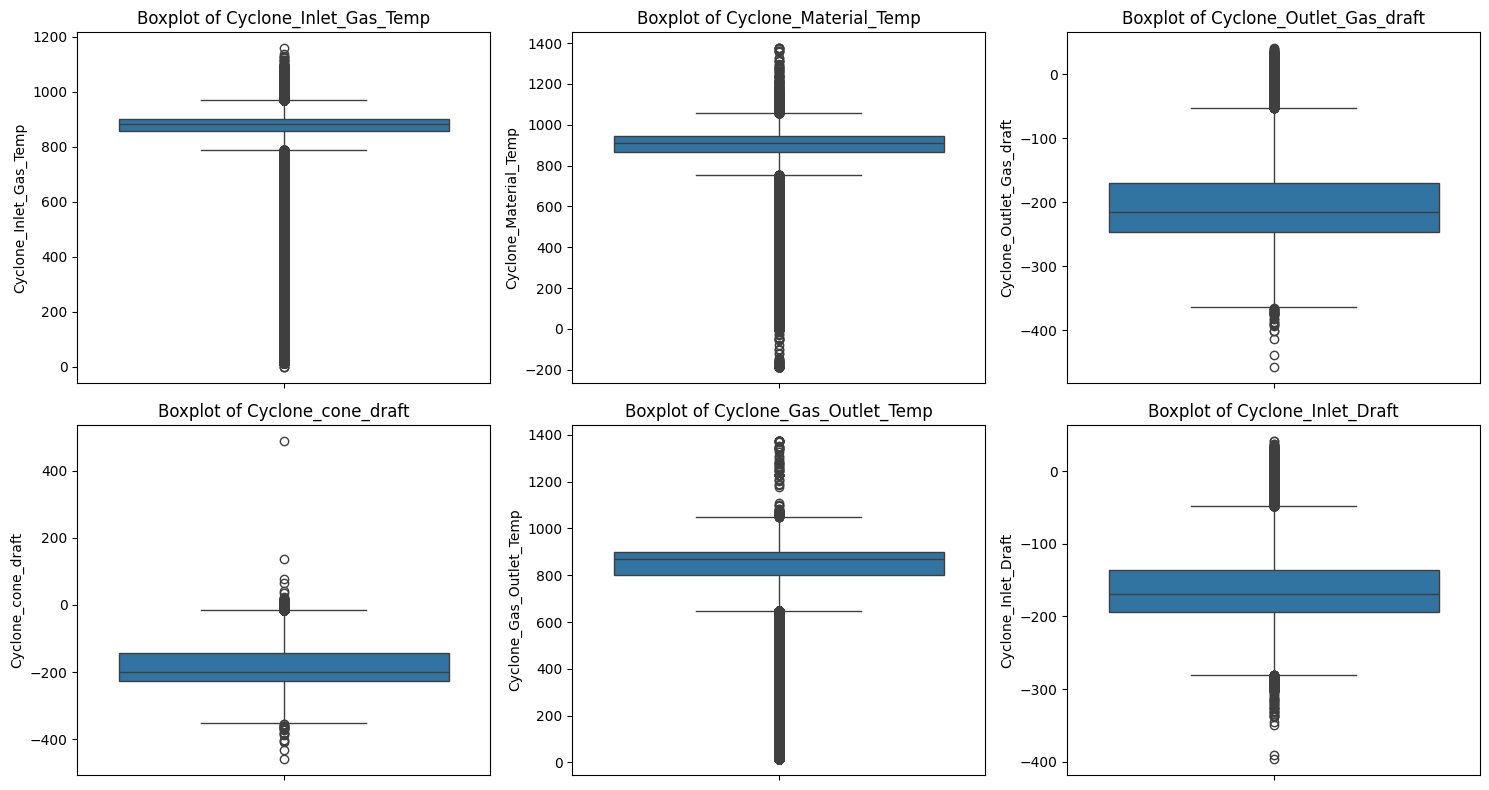

In [16]:
df_temp = df.copy()
df_temp = df.drop(columns = ['time'])

num_features = len(df_temp)

fig, axes = plt.subplots(2, 3, figsize = (15, 8))
axes = axes.flatten()  

for i, col in enumerate(df_temp.columns):
    sns.boxplot(y = df_temp[col], ax = axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Several outliers exist in all the features. However, dropping them is not helpful as that will disrupt the time series data and break the strict 5-minute index interval rule. Another option is to cap the outliers using the IQR method, which limits extreme values to the upper and lower bounds without removing any rows. 

In [17]:
def cap_outliers(df):
    for col in df.columns:
        if col == 'time':
            pass
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # capping values at bounds
        df[col] = df[col].clip(lower = lower_bound, upper = upper_bound)
    return df

df = cap_outliers(df)
iqr_outliers(df)

Number of outliers in time: 0
Number of outliers in Cyclone_Inlet_Gas_Temp: 0
Number of outliers in Cyclone_Material_Temp: 0
Number of outliers in Cyclone_Outlet_Gas_draft: 0
Number of outliers in Cyclone_cone_draft: 0
Number of outliers in Cyclone_Gas_Outlet_Temp: 0
Number of outliers in Cyclone_Inlet_Draft: 0


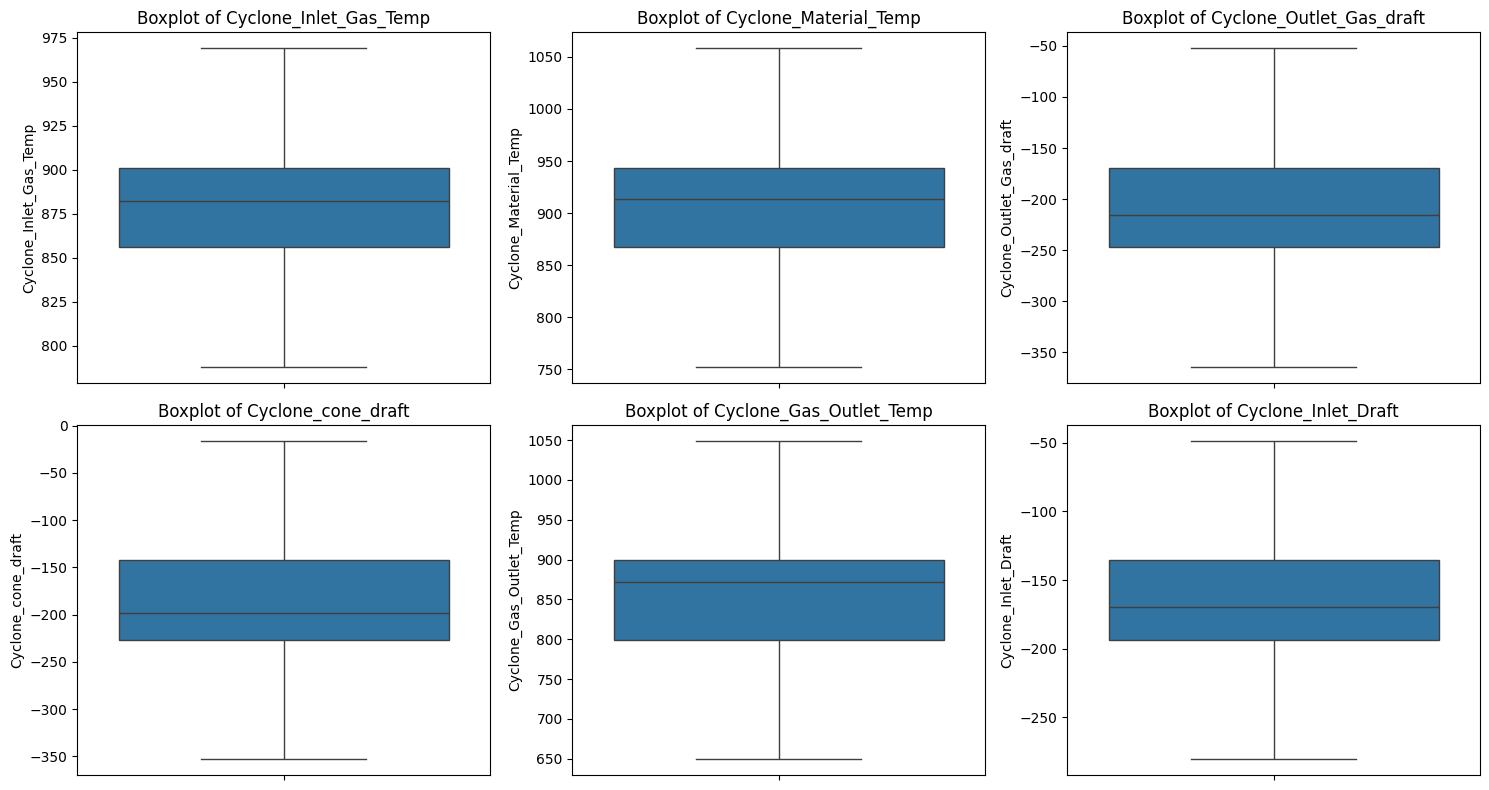

In [18]:
df_temp = df.copy()
df_temp = df.drop(columns = ['time'])

num_features = len(df_temp)

fig, axes = plt.subplots(2, 3, figsize = (15, 8))
axes = axes.flatten()  

for i, col in enumerate(df_temp.columns):
    if col == 'time':
        pass
    sns.boxplot(y = df_temp[col], ax = axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Outliers have been handled.

>##### __1.4 Summary statistics & correlation matrix__

In [19]:
df.describe()

time  Cyclone_Inlet_Gas_Temp  \
count                         377719           377719.000000   
mean   2018-10-18 18:14:59.999999232              869.919131   
min              2017-01-01 00:00:00              788.100000   
25%              2017-11-24 21:07:30              855.900000   
50%              2018-10-18 18:15:00              882.320000   
75%              2019-09-11 15:22:30              901.100000   
max              2020-08-04 12:30:00              968.900000   
std                              NaN               48.412216   

       Cyclone_Material_Temp  Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  \
count          377719.000000             377719.000000       377719.000000   
mean              890.063209               -188.900822         -167.130453   
min               752.307500               -364.022500         -353.140000   
25%               867.080000               -247.150000         -226.720000   
50%               913.230000               -215.080000         -198.430000   
75%               943.595000               -169.235000         -142.440000   
max              1058.367500                -52.362500          -16.020000   
std                78.831552                 79.099634           85.144410   

       Cyclone_Gas_Outlet_Temp  Cyclone_Inlet_Draft  
count            377719.000000        377719.000000  
mean                829.701829          -151.226320  
min                 649.340000          -280.360000  
25%                 799.280000          -193.450000  
50%                 871.400000          -169.360000  
75%                 899.240000          -135.510000  
max                1049.180000           -48.600000  
std                 102.061391            59.663736

There does not seem to be any disrapancy or issue from the the above values. What can be seen is a normal mean, variation and other statistics for each of the variables.

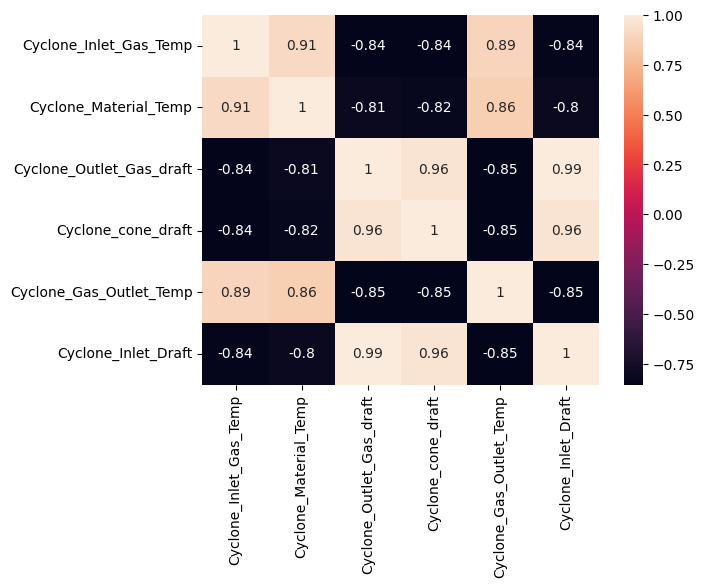

In [20]:
corr = df_temp.corr()
sns.heatmap(corr, annot = True)
plt.show()

Temperatures at inlet, outlet, and material seems to be are strongly positively correlated with each other. Gas drafts at different points (outlet, cone, inlet) are also highly correlated. Temperatures and drafts are strongly negatively correlated.<br><br>
Basically, two distinct groups exist, temperatures & drafts move together, and then these two groups are inversely related.

>##### __1.5 Visualizing representative slices__

___Random week:___

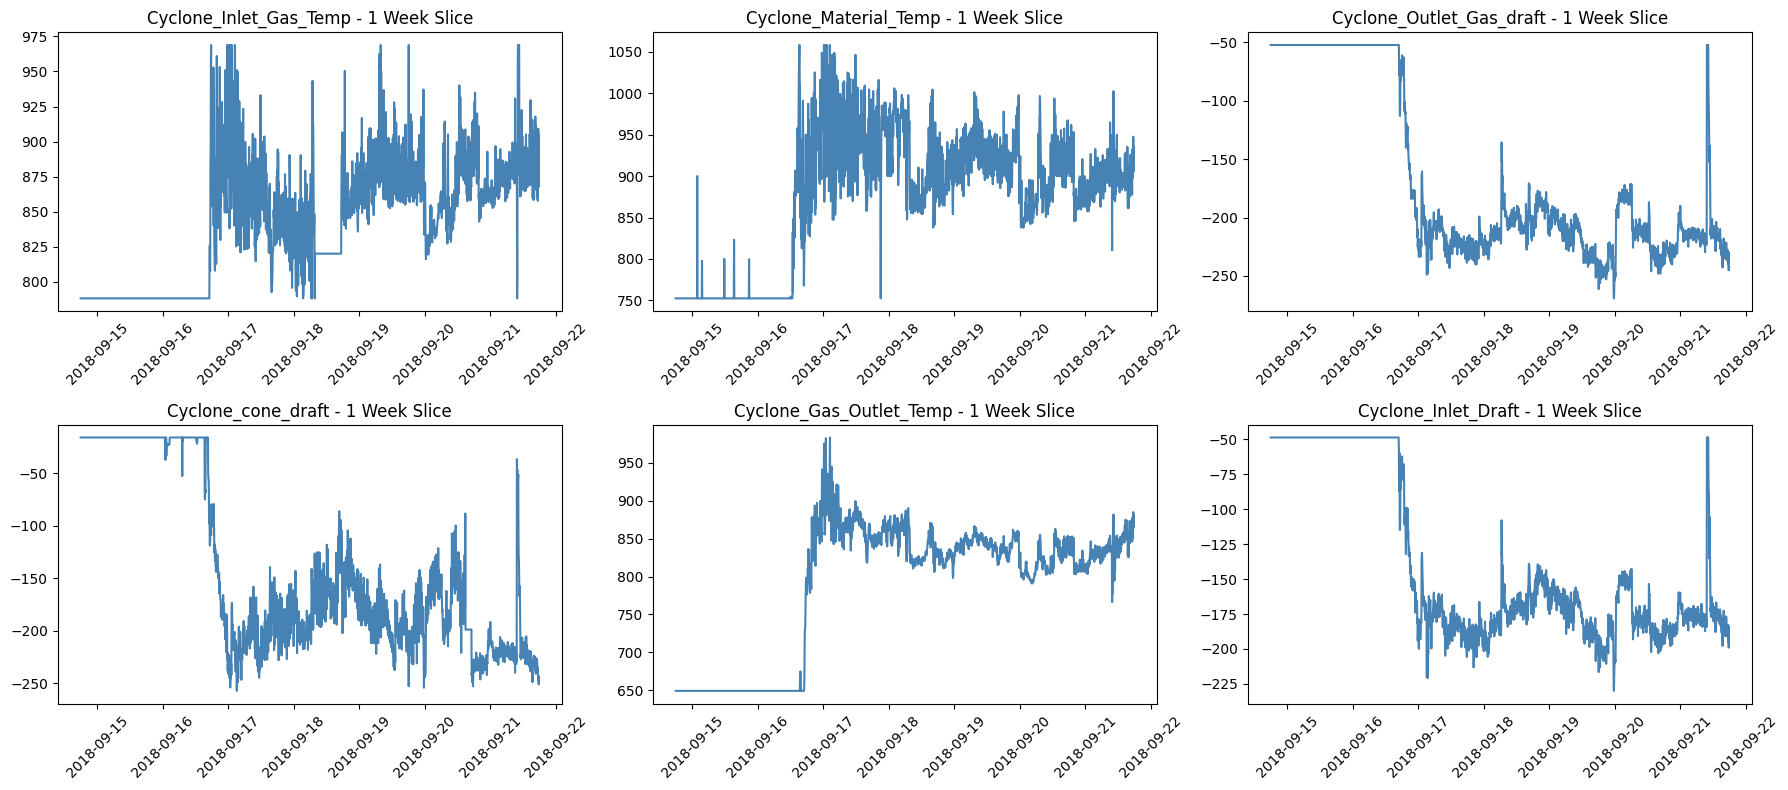

In [21]:
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')
variables = df.columns 

# random week
start_week = np.random.choice(df.index[:-288*7])  # 288 points/day × 7
end_week = start_week + pd.Timedelta(days = 7)
week_slice = df.loc[start_week:end_week]

fig, axes = plt.subplots(2, 3, figsize = (18, 8))
axes = axes.flatten()
for i, var in enumerate(variables):
    axes[i].plot(week_slice.index, week_slice[var], color = 'steelblue')
    axes[i].set_title(f"{var} - 1 Week Slice")
    axes[i].tick_params(axis = 'x', rotation = 45)
plt.tight_layout()
plt.show()

When considering at a weekly level, the temperature based plots tend to show stationarity with almost constant mean and variance. The draft values however seems to show fluctuations at certain points but then is steady after with lower variance.

___Random month:___

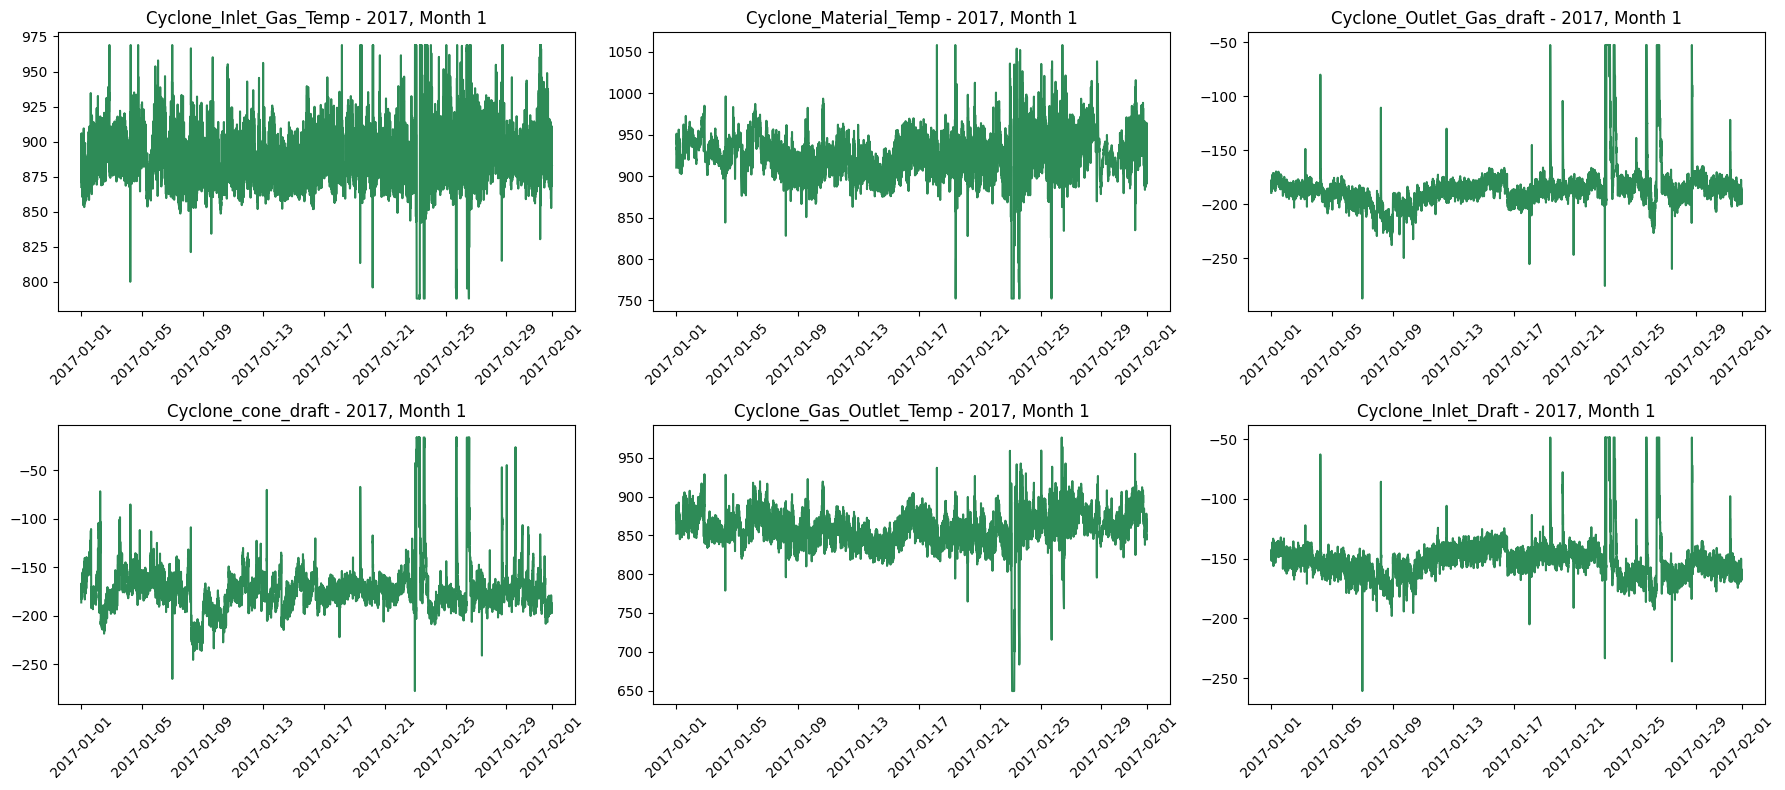

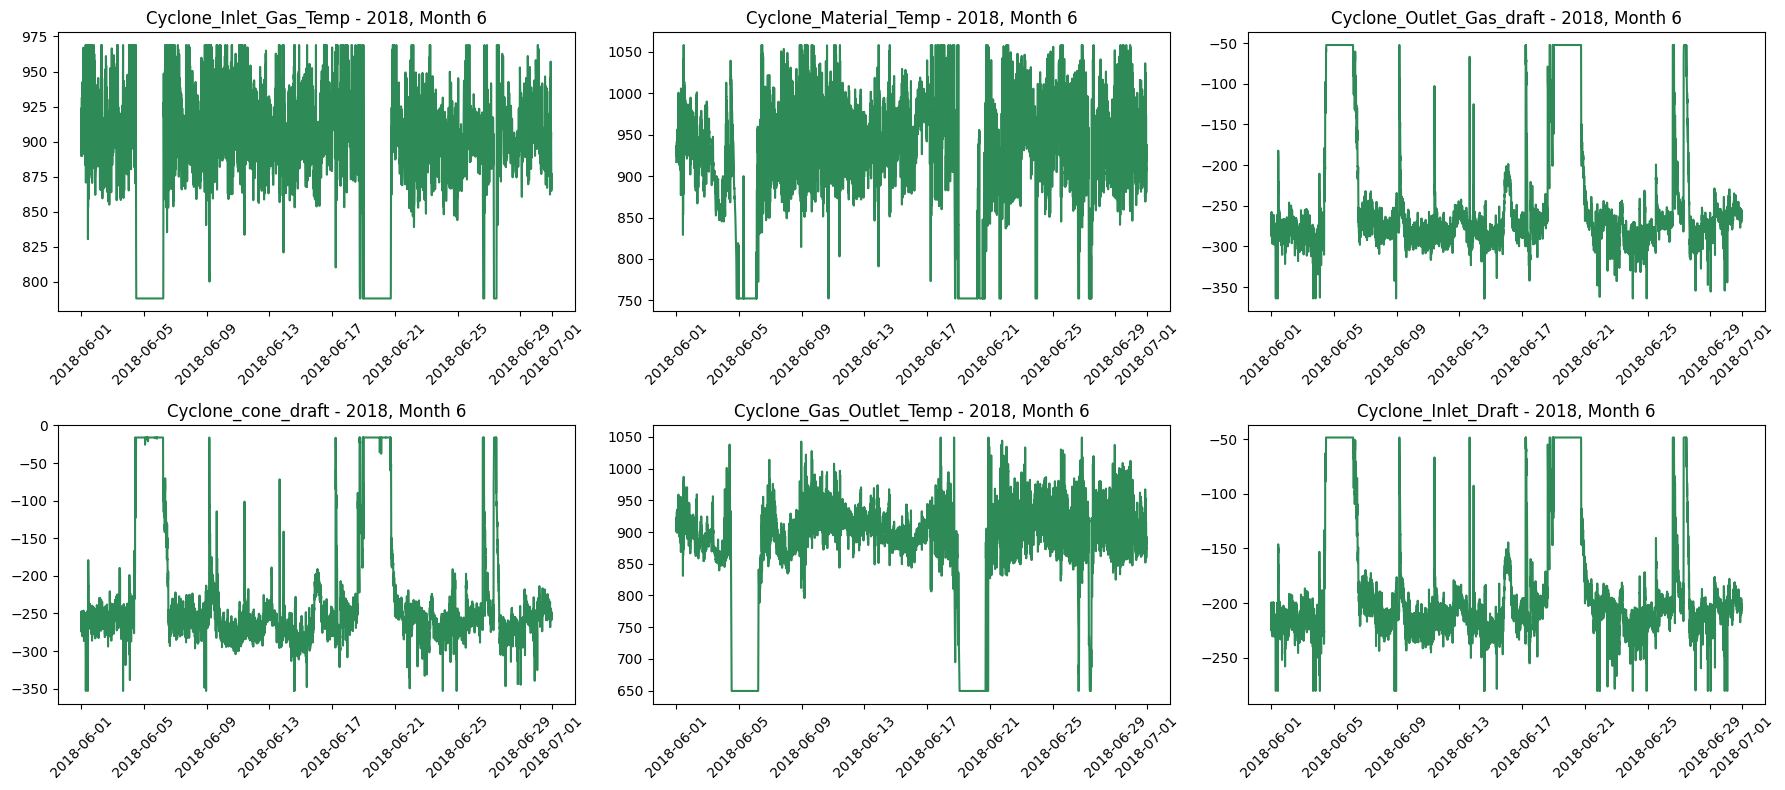

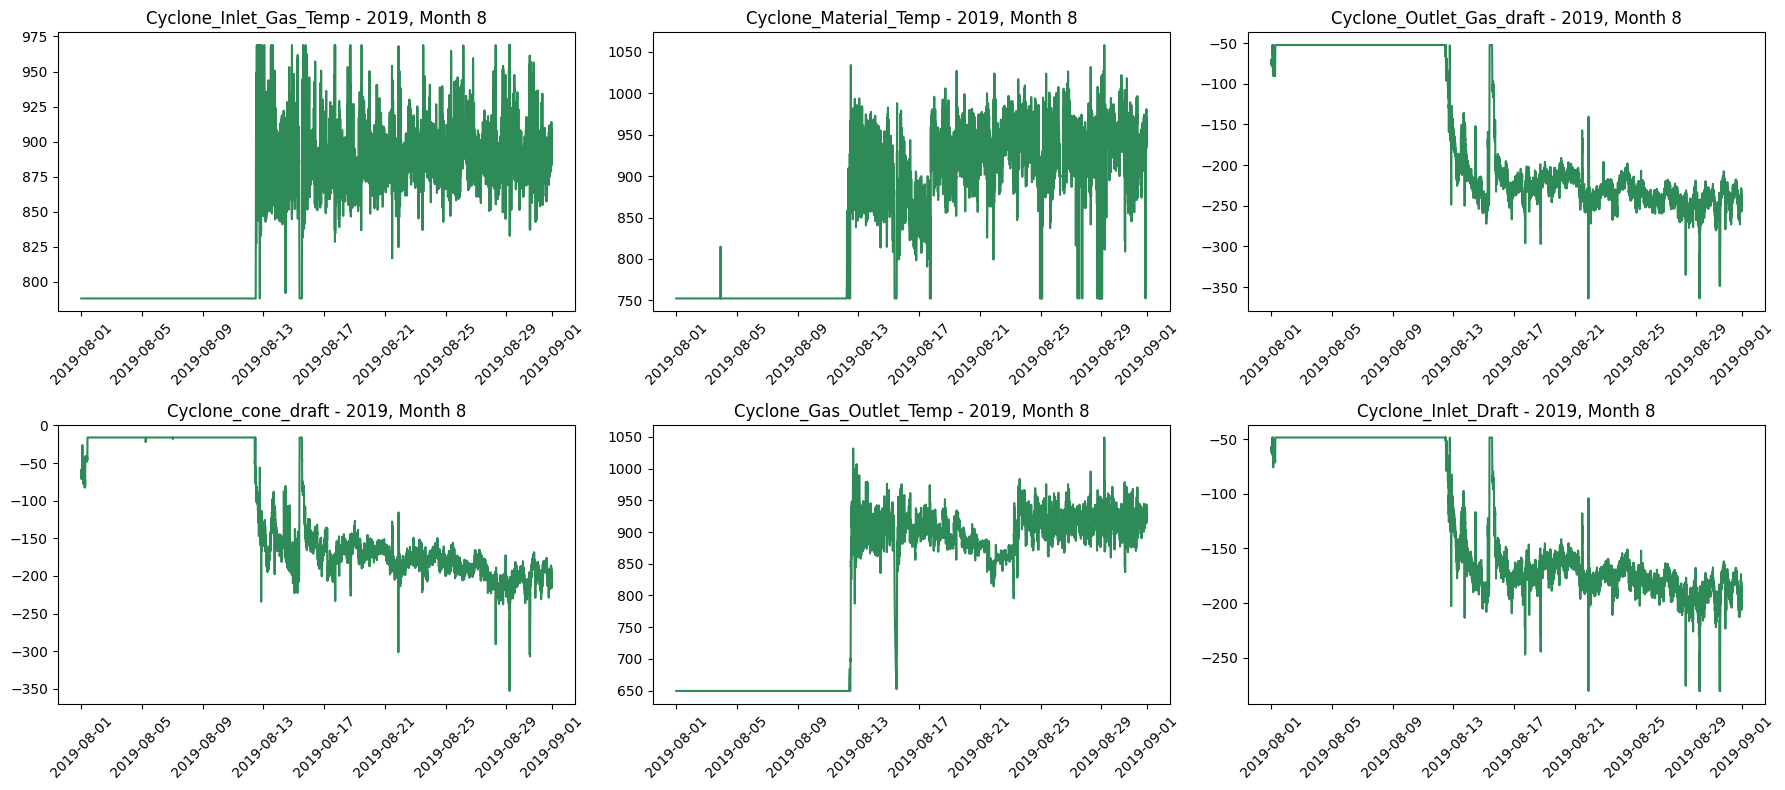

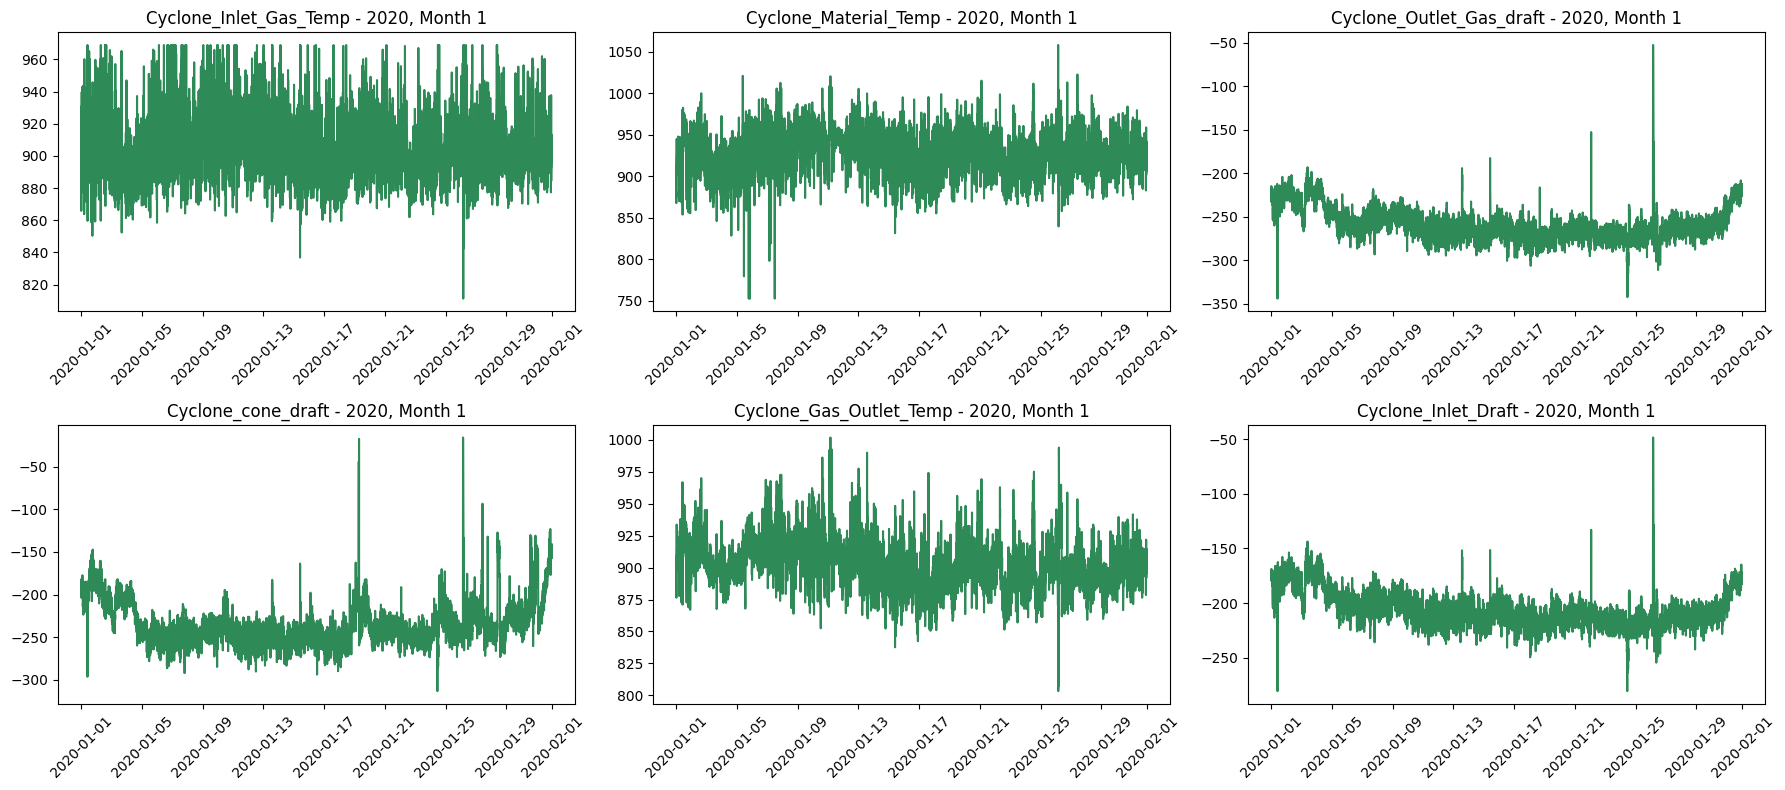

In [22]:
# random month per year
years = df.index.year.unique()
for y in years:
    year_slice = df[df.index.year == y]
    month = np.random.choice(year_slice.index.month.unique())
    month_slice = year_slice[year_slice.index.month == month]
    
    fig, axes = plt.subplots(2, 3, figsize = (18, 8))
    axes = axes.flatten()
    for i, var in enumerate(variables):
        axes[i].plot(month_slice.index, month_slice[var], color = 'seagreen')
        axes[i].set_title(f"{var} - {y}, Month {month}")
        axes[i].tick_params(axis = 'x', rotation = 45)
    plt.tight_layout()
    plt.show()

When we jump to analysis on a monthly level across the 4 years for all the 6 variables, we can see that the data again follows stationarity. However, it can also be seen that the machine seems to produce very low values for temperature and very high values for draft consistently at certain points. Now the fact that this is reflected on other variable plots at the same time may indicate that the machine might have entered a low functioning state. However, to confirm this we need more evidence.

___Per year:___

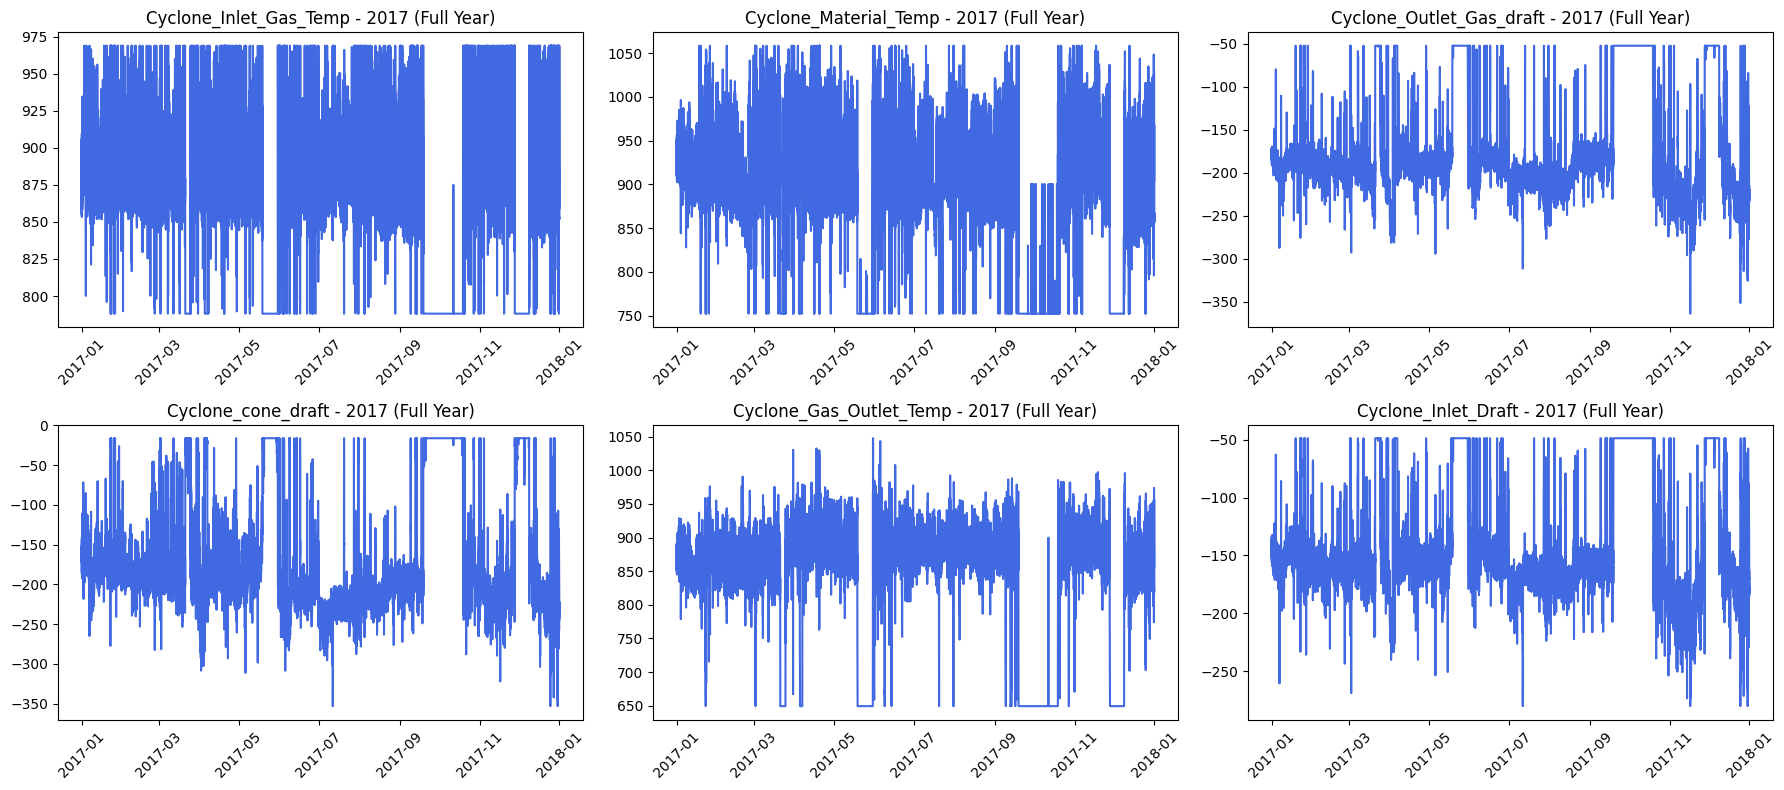

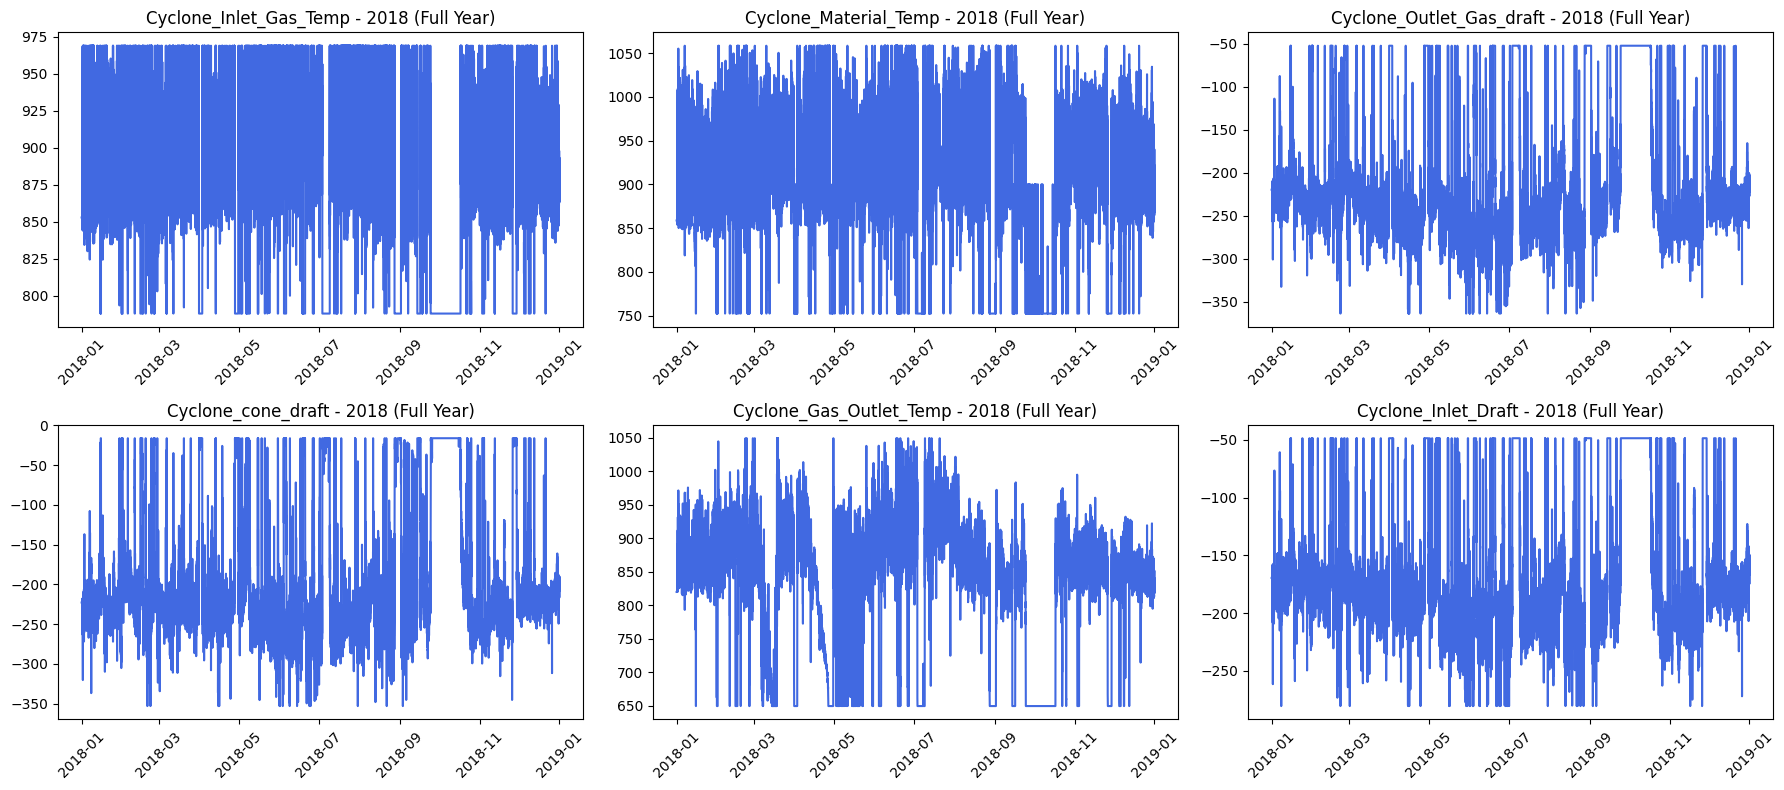

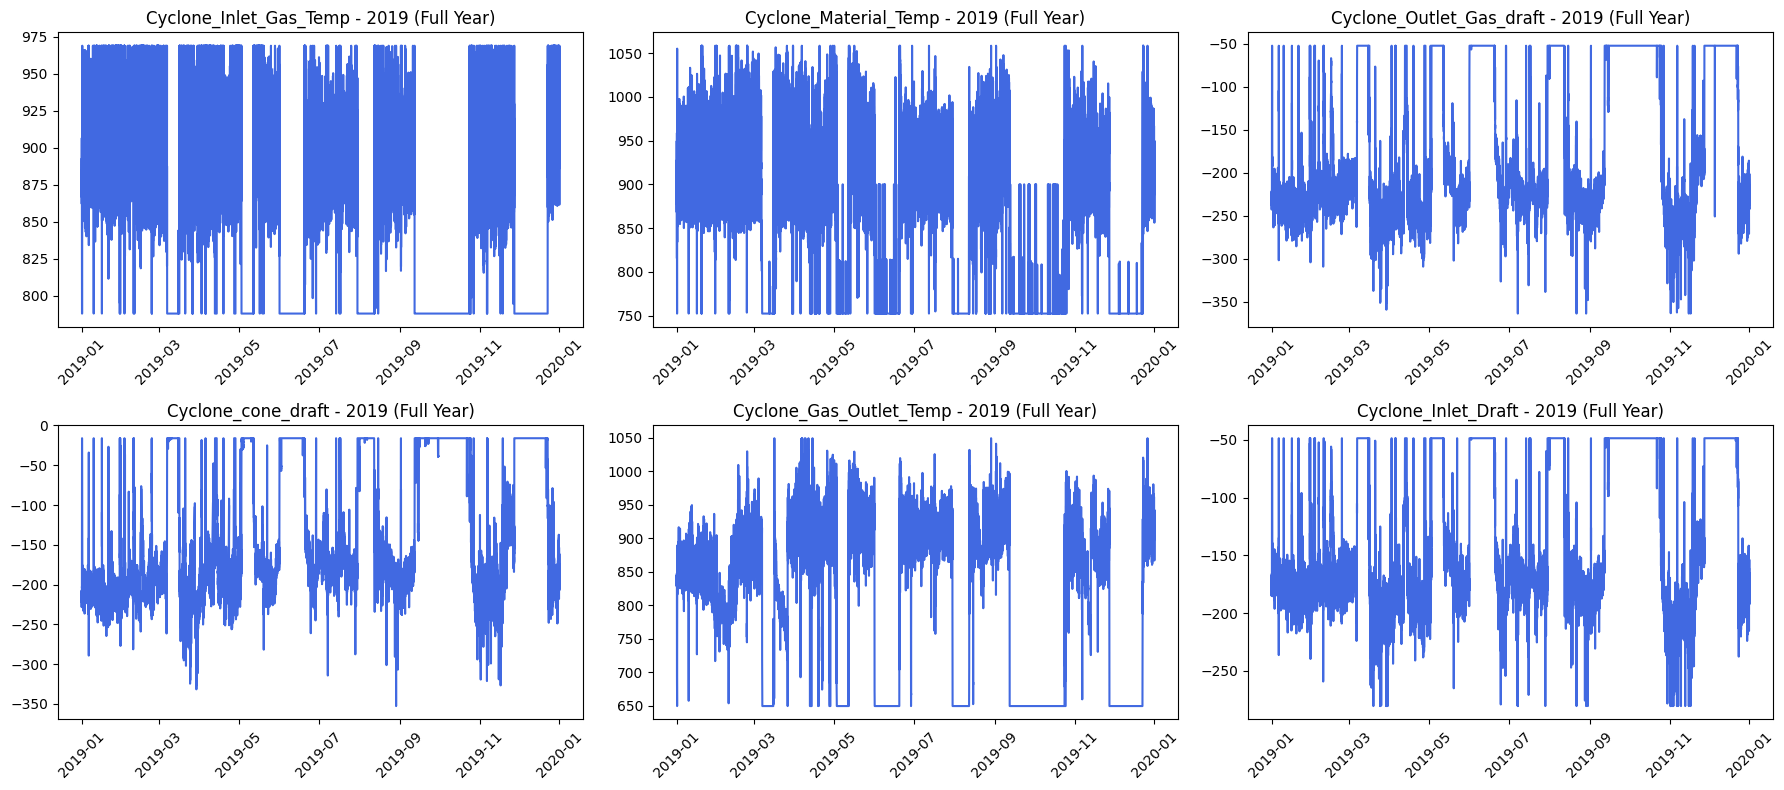

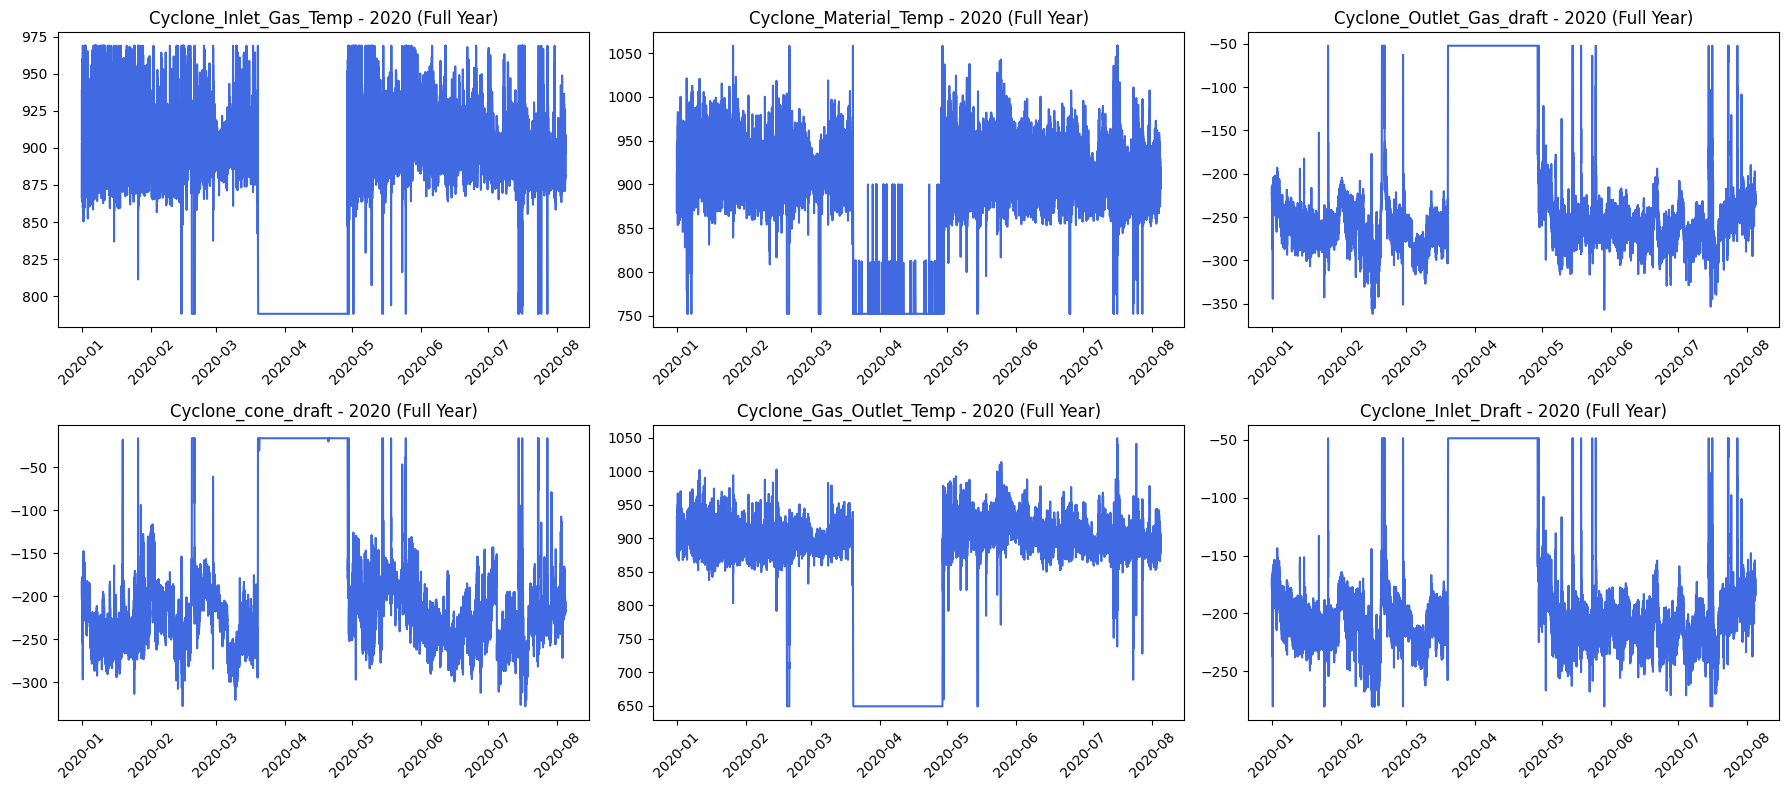

In [23]:
years = df.index.year.unique()

for y in years:
    year_slice = df[df.index.year == y]
    
    fig, axes = plt.subplots(2, 3, figsize = (18, 8))
    axes = axes.flatten()
    
    for i, var in enumerate(variables):
        axes[i].plot(year_slice.index, year_slice[var], color = 'royalblue')
        axes[i].set_title(f"{var} - {y} (Full Year)")
        axes[i].tick_params(axis = 'x', rotation = 45)
    
    plt.tight_layout()
    plt.show()

___Full 4 years:___

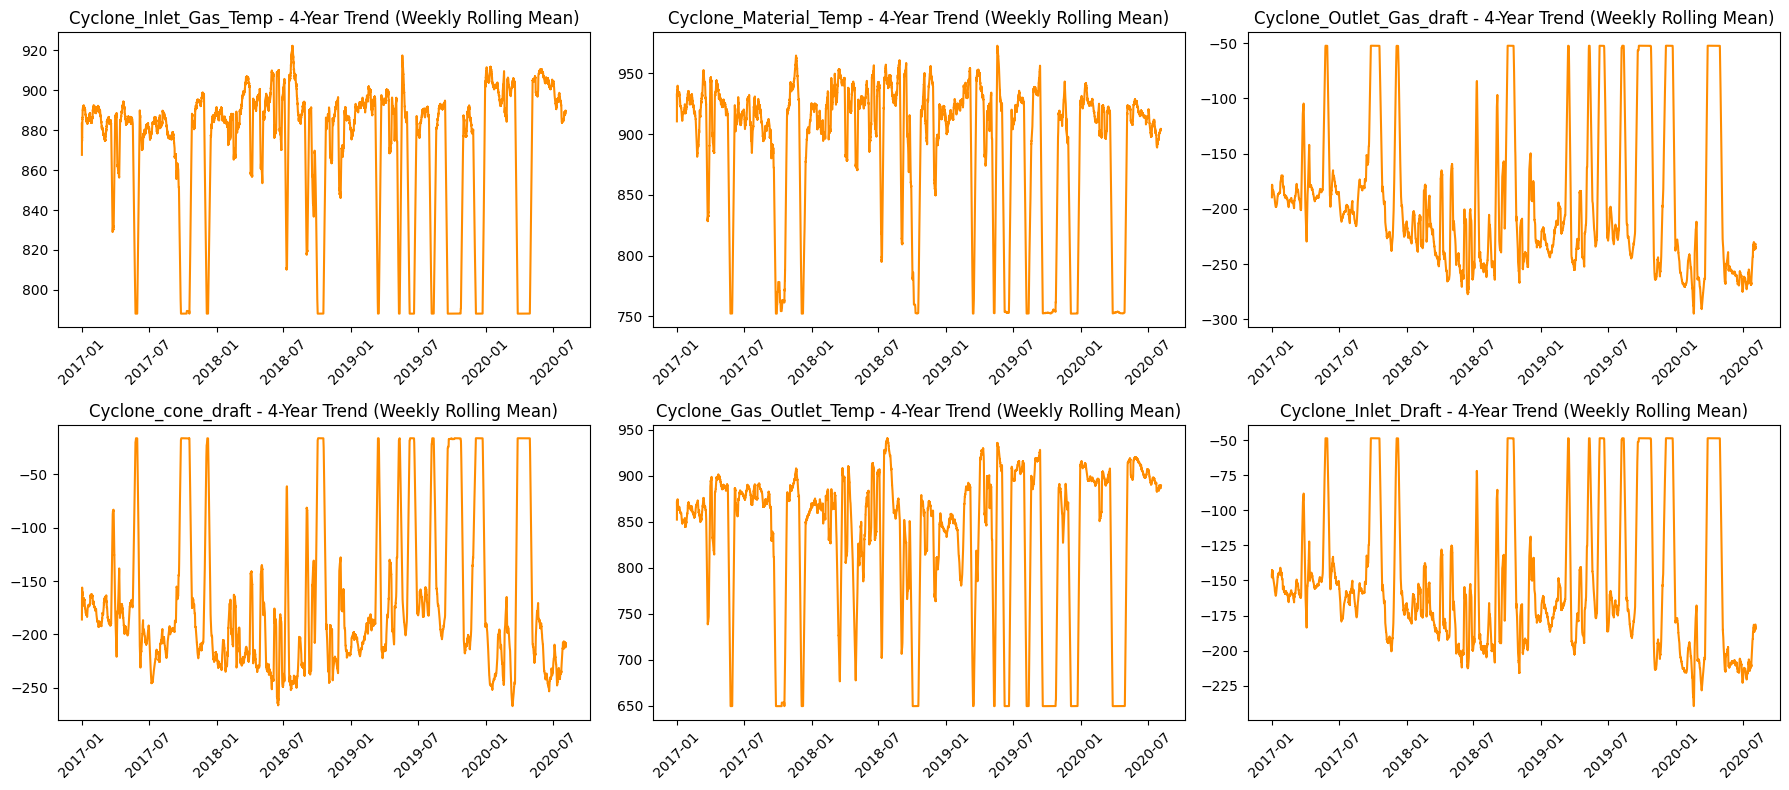

In [24]:
rolling_window = 288 * 7  

fig, axes = plt.subplots(2, 3, figsize = (18, 8))
axes = axes.flatten()
for i, var in enumerate(variables):
    axes[i].plot(df.index, df[var].rolling(window = rolling_window, min_periods = 1).mean(), color = 'darkorange')
    axes[i].set_title(f"{var} - 4-Year Trend (Weekly Rolling Mean)")
    axes[i].tick_params(axis = 'x', rotation = 45)   
plt.tight_layout()
plt.show()

Even for the full year per year plots & for the entire 4 year plot for each of the 6 variables, we can see similar patterns, where the machine readings stay consistently at one extreme for extended periods of time.<br><br>
__Note:__ The extreme values are not necessarily 0. Their absolute values are generally quite low as compared to the general trend.

---

### 2. Shutdown / Idle Period Detection

>##### __2.1 Programmatically detect and segment shutdown or idle periods__

From the dataset, we can see that there are several points where the sensor goes to shutdown. This is denoted by the keyword _I/O Timeout_. 

In [25]:
df = pd.read_excel("data.xlsx")
df_temp = df.copy()
df_temp.drop(columns = ['time'], inplace = True)

In [26]:
def get_idle_idx(df, col):
    ids = []
    for i in range(len(df)):
        if df[col].iloc[i] == "I/O Timeout":
            ids.append(i)
    return ids

column_timeout_indices = {}

for col in df.columns:
    ids = get_idle_idx(df, col)
    if ids:  
        column_timeout_indices[col] = ids

if column_timeout_indices:
    reference_indices = list(column_timeout_indices.values())[0]
    
    all_same = all(ids == reference_indices for ids in column_timeout_indices.values())
    
    if all_same:
        print("All columns have I/O Timeouts at the SAME indices")
        print(f"Common indices: {reference_indices}")
    else:
        print("Columns have I/O Timeouts at DIFFERENT indices")
        print("\nBreakdown by column:")
        for col, ids in column_timeout_indices.items():
            print(f"  {col}: {ids}")
        
        common_indices = set(reference_indices)
        for ids in column_timeout_indices.values():
            common_indices &= set(ids)
        print(f"\nCommon indices across all columns: {sorted(common_indices)}")
else:
    print("No I/O Timeouts found in any column")

All columns have I/O Timeouts at the SAME indices
Common indices: [2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2887, 2888, 2889, 2890, 2891, 2892, 2893, 2894, 2895, 2896, 2897, 2898, 5597, 15376, 15377, 15379, 15380, 15381, 15382, 15383, 15385, 15386, 15387, 15388, 15389, 15390, 15391, 27753, 27754, 27755, 27756, 27757, 40190, 40191, 40192, 40193, 40194, 40195, 40196, 40197, 40198, 40199, 40200, 40201, 40202, 40203, 40204, 40205, 40206, 40207, 40208, 40209, 40210, 40211, 40212, 40213, 40214, 40215, 40216, 49940, 49941, 49942, 49943, 49944, 49945, 49946, 49947, 49948, 49949, 49950, 62379, 62380, 62381, 62382, 62383, 62384, 62385, 62386, 62387, 62388, 62389, 62390, 62391, 62392, 62393, 62394, 62395, 62396, 62397, 62398, 62399, 62400, 62401, 69252, 69253, 74788, 74789, 74790, 74791, 74792, 74793, 74794

From the above output, we have detected two things:
1. Sensor goes idle at the same time for all the measurements / features
2. The idle state once started, stays idle for some continuous amount of time

>##### __2.2 Compute total downtime and number of shutdown events across 3 years__

In [27]:
print(f"Total number of shutdowns: {len(reference_indices)}")
print(f"Total downtime: {(len(reference_indices) * 5) / 60:.2f} hours")

Total number of shutdowns: 470
Total downtime: 39.17 hours


>##### __2.3 Provide a visualization of one full year with shutdowns clearly highlighted__

In [28]:
df = pd.read_excel('data.xlsx')
df_temp = df.copy()

In [29]:
shutdown_set = set(reference_indices)
df_temp['shutdown'] = df_temp.index.isin(shutdown_set).astype(int)
df_temp = df_temp.set_index('time')
df_temp = df_temp.apply(pd.to_numeric, errors = 'coerce')

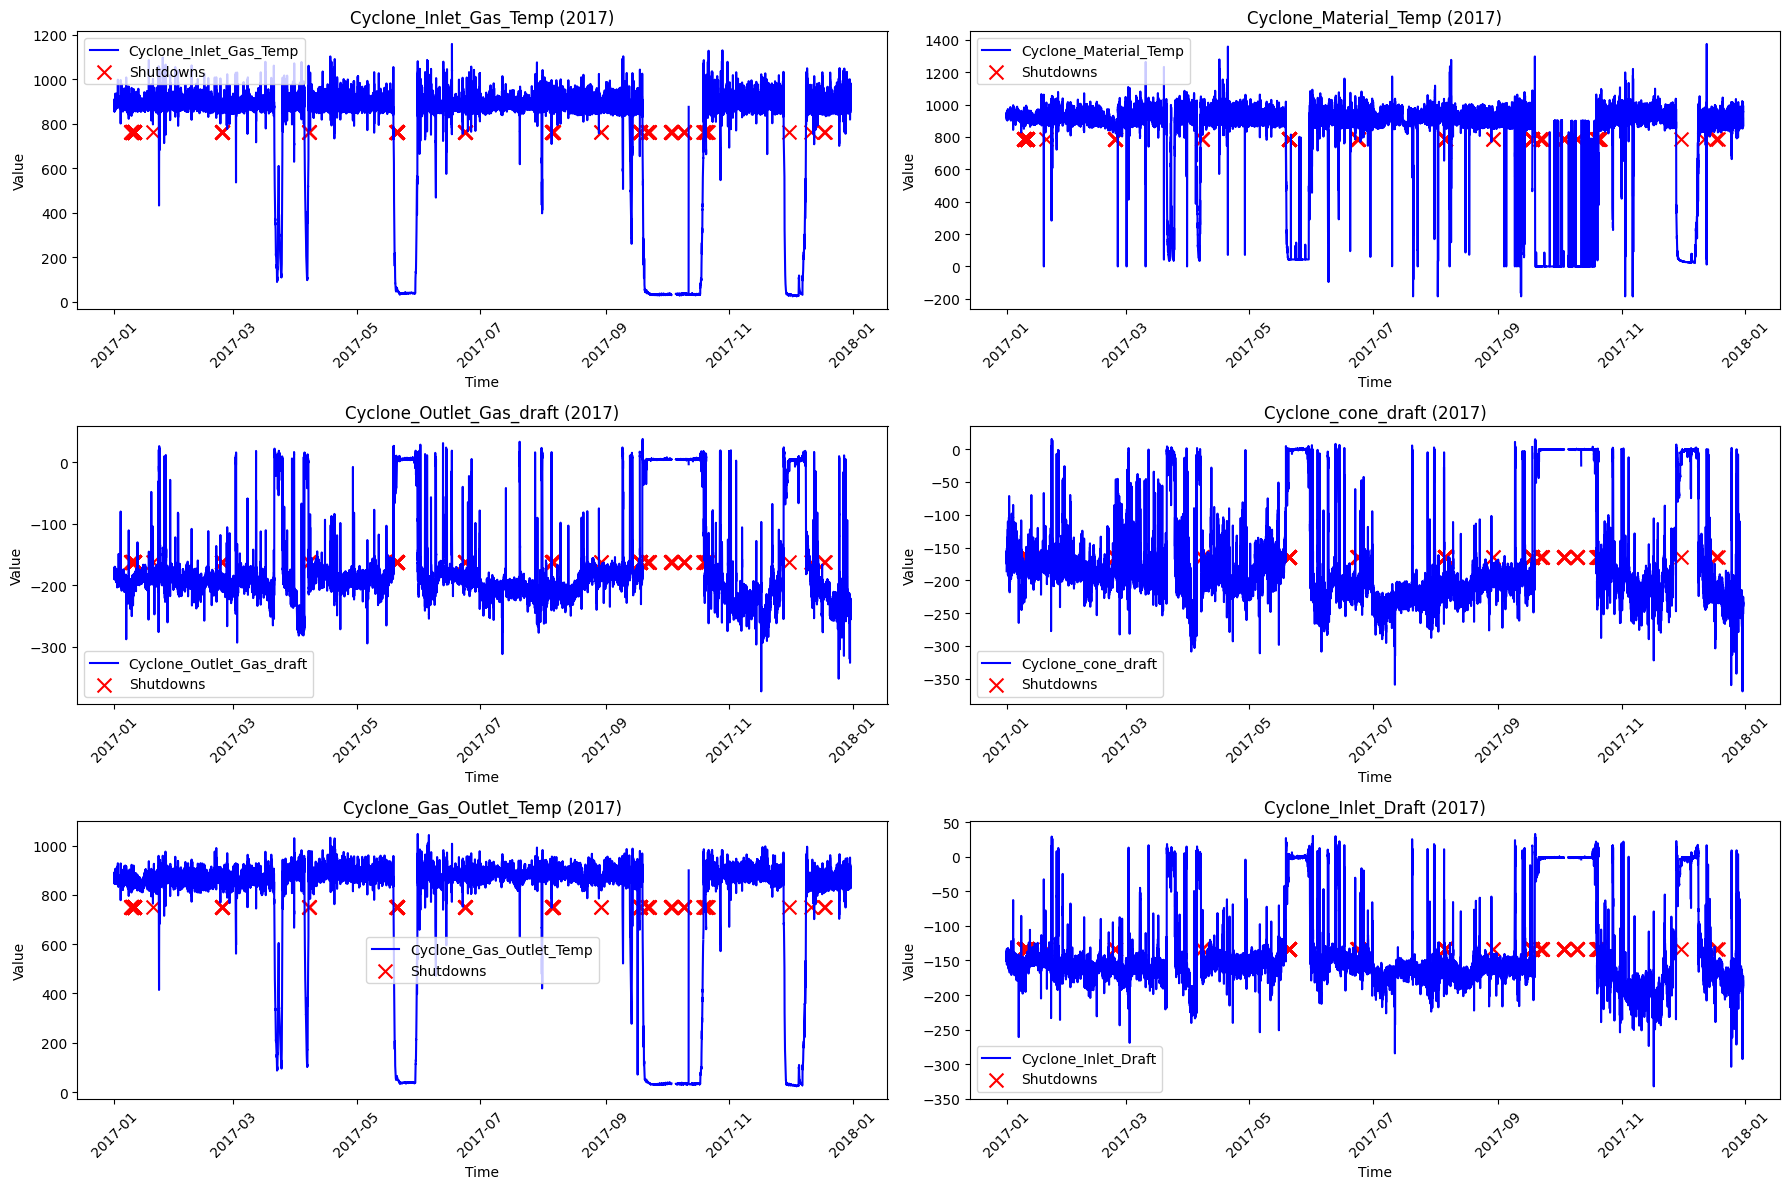

In [30]:
yr = '2017'
year_df = df_temp.loc[yr]

features = ['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp', 'Cyclone_Outlet_Gas_draft', 
            'Cyclone_cone_draft', 'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft']

fig, axes = plt.subplots(3, 2, figsize = (18, 12))
axes = axes.flatten()

shutdown_times = year_df[year_df['shutdown'] == 1].index

for i, feature in enumerate(features):
    axes[i].plot(year_df.index, year_df[feature], label = feature, color = 'blue')
    
    axes[i].scatter(shutdown_times, 
                    [year_df[feature].mean()] * len(shutdown_times), 
                    color = 'red', marker = 'x', s = 100, label = 'Shutdowns')
    
    axes[i].set_title(f"{feature} ({yr})")
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Value")
    axes[i].legend()
    axes[i].tick_params(axis = 'x', rotation = 45)

plt.tight_layout()
plt.show()

Now we export the shutdown duration data as a CSV file.

In [31]:
shutdown_indices = [2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2887, 2888, 2889, 2890, 2891, 2892, 2893, 2894, 2895, 2896, 2897, 2898, 5597, 15376, 15377, 15379, 15380, 15381, 15382, 15383, 15385, 15386, 15387, 15388, 15389, 15390, 15391, 27753, 27754, 27755, 27756, 27757, 40190, 40191, 40192, 40193, 40194, 40195, 40196, 40197, 40198, 40199, 40200, 40201, 40202, 40203, 40204, 40205, 40206, 40207, 40208, 40209, 40210, 40211, 40212, 40213, 40214, 40215, 40216, 49940, 49941, 49942, 49943, 49944, 49945, 49946, 49947, 49948, 49949, 49950, 62379, 62380, 62381, 62382, 62383, 62384, 62385, 62386, 62387, 62388, 62389, 62390, 62391, 62392, 62393, 62394, 62395, 62396, 62397, 62398, 62399, 62400, 62401, 69252, 69253, 74788, 74789, 74790, 74791, 74792, 74793, 74794, 74795, 74796, 74797, 74798, 74799, 74800, 74801, 74802, 74803, 74804, 74805, 74806, 74807, 74808, 74809, 74810, 75885, 75886, 76177, 76178, 76179, 76180, 76181, 79320, 79321, 79322, 79323, 79324, 79325, 79326, 79327, 79328, 79329, 79330, 79331, 79332, 79333, 79334, 79335, 81121, 81122, 81123, 81124, 81125, 81126, 81127, 81128, 81129, 81130, 81131, 81132, 83853, 84021, 84235, 84237, 84263, 84265, 84268, 84269, 84517, 96029, 99186, 101024, 101231, 141340, 141346, 141351, 141376, 141626, 141630, 141638, 141662, 141829, 141884, 152206, 152207, 152208, 152209, 152210, 152211, 152212, 152213, 152214, 152215, 152216, 152217, 152218, 152219, 152220, 152221, 152222, 152223, 152224, 152225, 152226, 152278, 152279, 152280, 152281, 152282, 152283, 152284, 152285, 152286, 152287, 152288, 152289, 153445, 153446, 153447, 153448, 153449, 153450, 153451, 153452, 153453, 153454, 153455, 153456, 153556, 153557, 153558, 153559, 153560, 153561, 153562, 153563, 153564, 153565, 153566, 153568, 153569, 153570, 153571, 153572, 153573, 153574, 153575, 153576, 153577, 153578, 153579, 153611, 153612, 153613, 153614, 153615, 153616, 153617, 153618, 153619, 153620, 153621, 153622, 153623, 153624, 153625, 153626, 153627, 153628, 153629, 153630, 153631, 153632, 153633, 153634, 153635, 187647, 187953, 187954, 189934, 199702, 199703, 199704, 199705, 199706, 199707, 199708, 199709, 199710, 199711, 199712, 199713, 199714, 199715, 199716, 199717, 199718, 199719, 199720, 199721, 199722, 199723, 199724, 199725, 199726, 199727, 199728, 199729, 199730, 199731, 199732, 199733, 199734, 199735, 199736, 199737, 199738, 199739, 199740, 199741, 199742, 199743, 199744, 199745, 199746, 199747, 199748, 199749, 199750, 199751, 199752, 199753, 199754, 199755, 199756, 199757, 199758, 199759, 199760, 199761, 203800, 220209, 230258, 230259, 230293, 230294, 230295, 230296, 230297, 230298, 230299, 230300, 230301, 230302, 231124, 241197, 241198, 241199, 241200, 241201, 241202, 241203, 241204, 241205, 241206, 241207, 241208, 241209, 241210, 241211, 241212, 253645, 253646, 253647, 253654, 260567, 260568, 260569, 293628, 293653, 293654, 293655, 293656, 301150, 301151, 301152, 301153, 301154, 301155, 301156, 301157, 301158, 301159, 301160, 301161, 301162, 301163, 301164, 301165, 303683, 307738, 308850, 313179, 313467, 313468, 313469, 313470, 313471, 313472, 313473, 313474, 313475, 313476, 313477, 313478, 322796, 322797, 322798, 322799, 322800, 322801, 322802, 322803, 322804, 322805, 322806, 322807, 322808, 322809, 322810, 322811, 322812, 322813, 322814, 322815, 322816, 322817, 322818]

shutdown_series = pd.Series(0, index=df.index)
shutdown_series.loc[shutdown_indices] = 1

shutdown_diff = shutdown_series.diff().fillna(0)
shutdown_starts = shutdown_series[(shutdown_diff == 1)].index.tolist()
shutdown_ends = shutdown_series[(shutdown_diff == -1)].index.tolist()

if shutdown_series.iloc[0] == 1:
    shutdown_starts = [shutdown_series.index[0]] + shutdown_starts
if shutdown_series.iloc[-1] == 1:
    shutdown_ends = shutdown_ends + [shutdown_series.index[-1]]


shutdown_periods = []
interval_minutes = 5  # your interval
for start_idx, end_idx in zip(shutdown_starts, shutdown_ends):
    start_time = df.loc[start_idx, 'time']
    end_time = df.loc[end_idx, 'time']
    duration_hours = ((end_idx - start_idx) + 1) * interval_minutes / 60
    shutdown_periods.append({
        'start': start_time,
        'end': end_time,
        'duration_hours': round(duration_hours, 2)
    })

shutdown_periods_df = pd.DataFrame(shutdown_periods)
shutdown_periods_df.to_csv('shutdown_periods.csv', index=False)
print("CSV saved.")

CSV saved.


---

### 3. Machine State Segmentation (Clustering)

In [32]:
df = pd.read_excel('data.xlsx')

df.replace('I/O Timeout', 0, inplace = True) # replacing shutdown state values to 0

for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')

df.fillna(df.mean(), inplace=True)

features = df.columns[1:]
X = df[features].values

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
kmeans = KMeans(n_clusters = 3, random_state = 42, n_init = 10)
labels = kmeans.fit_predict(X_scaled)

df['state'] = labels

The choice of 3 was made based on trial and error. Initially it was 4, but the final cluster plot seemed to make two clusters on the same location (active state). Therefore, it was reduced to 3.

In [35]:
state_counts = df['state'].value_counts()

state_duration = state_counts * 5
print(state_duration)

state
0    1468630
1     357005
2      62960
Name: count, dtype: int64


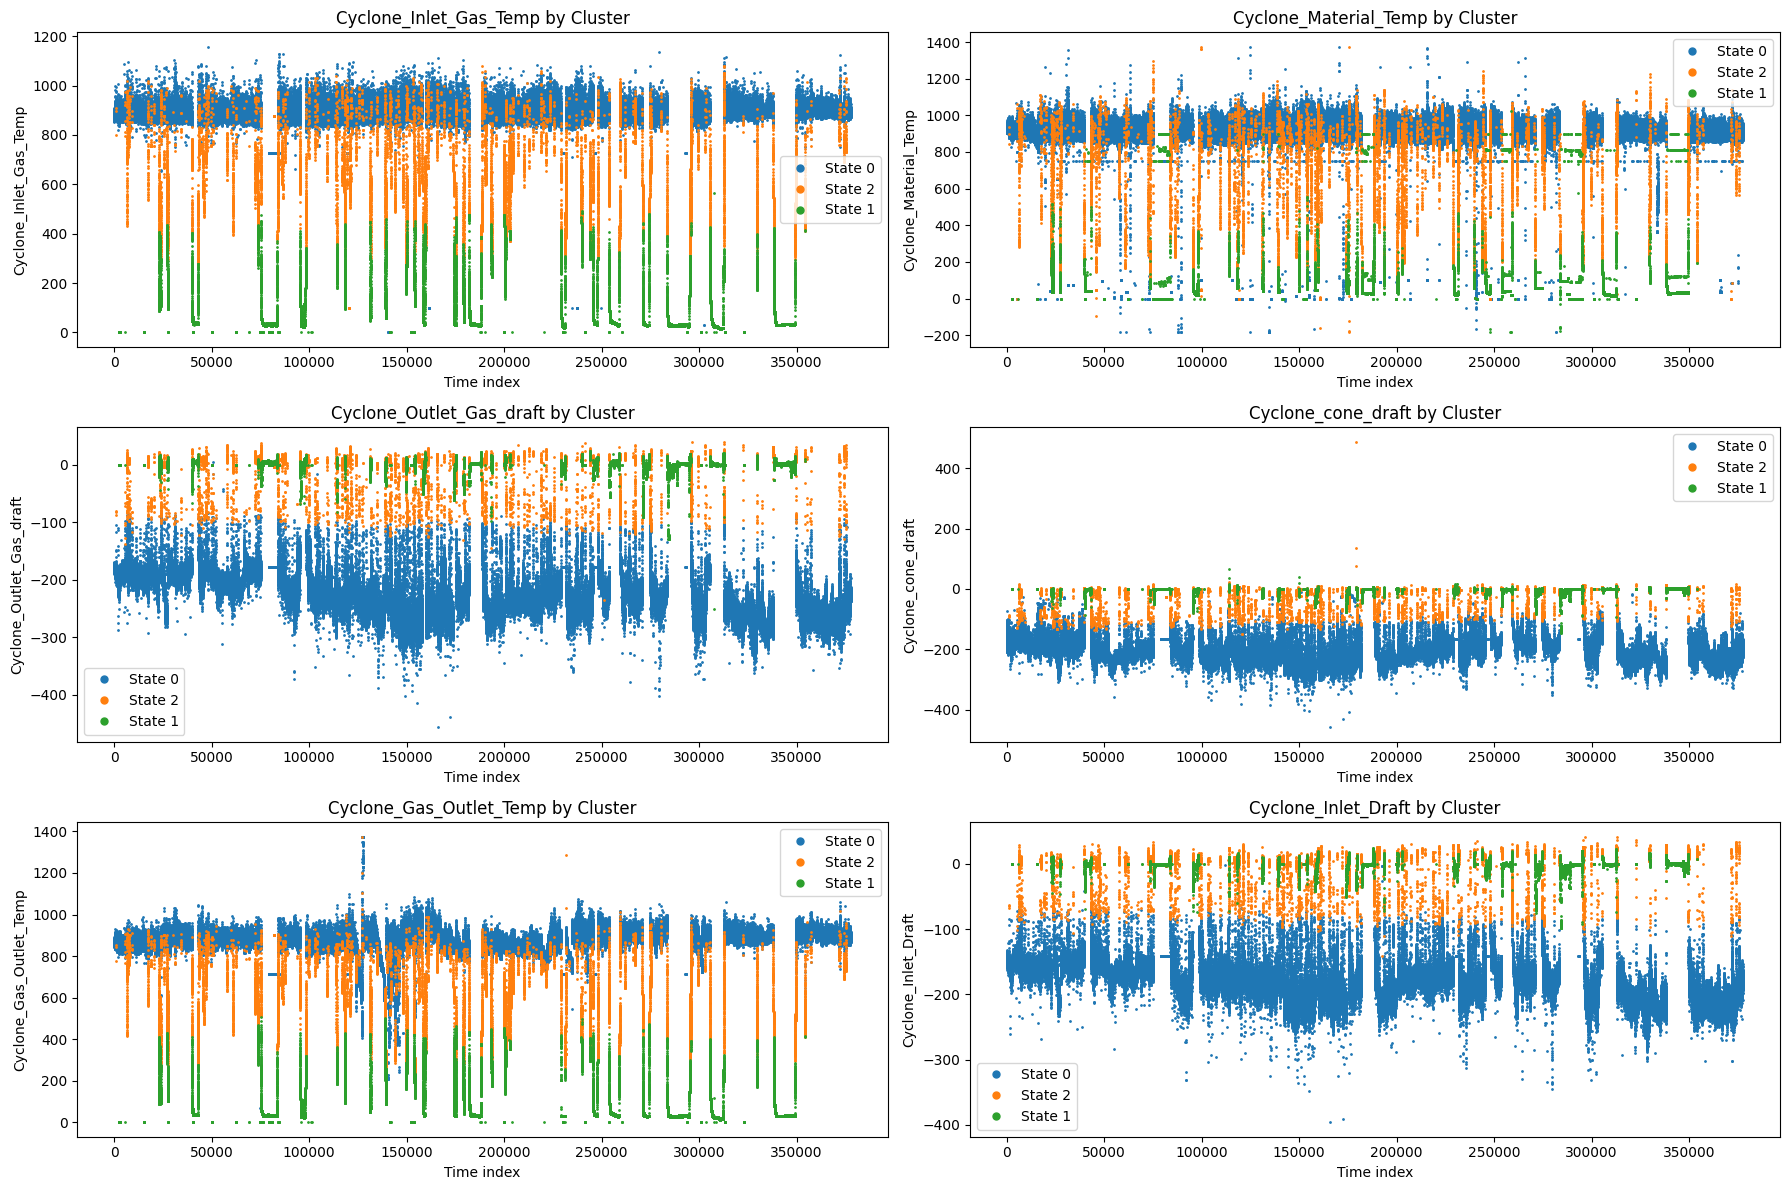

In [36]:
features = [col for col in df.columns if col not in ['time', 'shutdown', 'state']]

fig, axes = plt.subplots(3, 2, figsize = (18, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    for state in df['state'].unique():
        subset = df[df['state'] == state]
        axes[i].plot(subset.index, subset[feature], 
                     linestyle = '', marker = '.', markersize=2, label = f'State {state}')
    
    axes[i].set_xlabel('Time index')
    axes[i].set_ylabel(feature)
    axes[i].set_title(f'{feature} by Cluster')
    axes[i].legend(markerscale = 5)

plt.tight_layout()
plt.show()

From the plot, we can infer that the 3 clusters, state 0, 1 & 2, can be called as active state, inactive active and moderately active state respectively.

In [37]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

cluster_summary = df.groupby('state')[features].agg(['mean', 'std', 'min', 'max', 'count'])
print(cluster_summary)

      Cyclone_Inlet_Gas_Temp                                      \
                        mean         std    min      max   count   
state                                                              
0                 892.299996   29.045245   0.00  1157.63  293726   
1                  60.225488   76.403784   0.00   563.47   71401   
2                 635.234534  170.658911  96.39  1081.03   12592   

      Cyclone_Material_Temp                                      \
                       mean         std    min      max   count   
state                                                             
0                922.697375   70.071409 -185.0  1375.00  293726   
1                 58.544318  126.206017 -185.0  1022.53   71401   
2                639.188884  274.849918 -185.0  1375.00   12592   

      Cyclone_Outlet_Gas_draft                                    \
                          mean        std     min    max   count   
state                                               

From the above summary, we can infer that:
<br><br>
STATE 0 (Active):<br>
High temperatures (880-920°C), Strong negative drafts (-180 to -228) & Low variability :- Full Load / Normal Production<br><br>
STATE 1 (Not Active):<br>
Very low temperatures (~60°C), Minimal drafts (-1 to -4) & High variability :- Shutdown / Idle <br><br>
STATE 2 (Moderately Active):<br>
Mid-range temperatures (615-640°C), Weak drafts (-4 to -19) & Very high variability :- Startup / Shutdown Transition

In [38]:
df_sorted = df.sort_index().copy()
df_sorted['state_change'] = (df_sorted['state'] != df_sorted['state'].shift(1)).astype(int)
df_sorted['state_run_id'] = df_sorted['state_change'].cumsum()

duration_stats = df_sorted.groupby(['state', 'state_run_id']).size().reset_index(name = 'duration_intervals')
duration_summary = duration_stats.groupby('state').agg({
    'duration_intervals': ['count', 'mean', 'std', 'min', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.50), lambda x: x.quantile(0.75)]
}).round(2)

duration_summary.columns = ['Occurrences', 'Mean', 'Std', 'Min', 'Max', '25%', '50%', '75%']

duration_hours = duration_summary.copy()
time_cols = ['Mean', 'Std', 'Min', 'Max', '25%', '50%', '75%']
duration_hours[time_cols] = (duration_hours[time_cols] * 5 / 60).round(2)

In [39]:
print("Duration per Occurrence (in hours):")
print(duration_hours)

total_samples = len(df)
state_counts = df['state'].value_counts().sort_index()

proportion_df = pd.DataFrame({
    'Total_Samples': state_counts,
    'Percentage': (state_counts / total_samples * 100).round(2),
    'Total_Hours': (state_counts * 5 / 60).round(2),
    'Total_Days': (state_counts * 5 / 60 / 24).round(2)
})

print("\nOverall Time Distribution:")
print(proportion_df)

Duration per Occurrence (in hours):
       Occurrences   Mean     Std   Min      Max   25%    50%    75%
state                                                               
0              423  57.87  108.16  0.08  1211.83  0.29  13.83  78.79
1              169  35.21  120.29  0.08   924.25  0.17   0.92   7.42
2              471   2.23    3.95  0.08    27.42  0.08   0.50   2.29

Overall Time Distribution:
       Total_Samples  Percentage  Total_Hours  Total_Days
state                                                    
0             293726       77.76     24477.17     1019.88
1              71401       18.90      5950.08      247.92
2              12592        3.33      1049.33       43.72


Based on the frequency and duration statistics, the machine operates in a binary fashion: either fully on (State 0) or fully off (State 1), with minimal time spent transitioning between states. This suggests efficient startup/shutdown procedures. A high percentage of active state (77.76%) also suggests that the machine is mostly active and working. However, 18.90% of the time, the machine is inactive. This is a problematic sign as well.

Now we export the cluster summary data as a CSV file.

In [40]:
cluster_summary_flat = cluster_summary.copy()
cluster_summary_flat.columns = ['_'.join(col).strip() for col in cluster_summary_flat.columns.values]
cluster_summary_flat = cluster_summary_flat.reset_index()

duration_hours_reset = duration_hours.reset_index()
clusters_summary_df = pd.merge(cluster_summary_flat, duration_hours_reset, on='state', how='left')

clusters_summary_df.to_csv('clusters_summary.csv', index=False)
print("CSV saved.")

CSV saved.


---

### 4. Contextual Anomaly Detection + Root Cause Analysis
___Note:__ This specific task was very confusing for me to understand, and I was not exactly sure how to apprach solvig this. Most of the code in this section is LLM generated without much edit. Moreover, towards the insights & story telling section, I have not discussed about anomalies._

In [41]:
anomaly_list = []

for cluster in df['state'].unique():
    cluster_data = df[df['state'] == cluster]
    sensors = cluster_data.columns.difference(['time', 'state'])
    
    clf = IsolationForest(contamination = 0.01, random_state = 42)
    clf.fit(cluster_data[sensors])
    
    cluster_data['anomaly'] = clf.predict(cluster_data[sensors])
    cluster_data['anomaly'] = cluster_data['anomaly'].map({1:0, -1:1})  # 1 = anomaly
    
    anomalies = cluster_data[cluster_data['anomaly']==1]
    anomaly_list.append(anomalies)

anomalies_df = pd.concat(anomaly_list).sort_values('time')
print(f"Total anomalies detected: {len(anomalies_df)}")

Total anomalies detected: 3778


In [42]:
root_causes = []
for idx, row in anomalies_df.iterrows():
    
    # find sensor with largest deviation from cluster median
    cluster_data = df[df['state'] == row['state']]
    sensors = cluster_data.columns.difference(['time', 'state'])
    deviations = np.abs(row[sensors] - cluster_data[sensors].median())
    main_sensor = deviations.idxmax()
    root_causes.append((row['time'], row['state'], main_sensor, row[main_sensor]))

root_causes_df = pd.DataFrame(root_causes, columns = ['time','cluster','most_implicated_sensor','value'])
print(root_causes_df.head())

                 time  cluster    most_implicated_sensor   value
0 2017-01-04 05:45:00        0  Cyclone_Outlet_Gas_draft -105.15
1 2017-01-04 05:50:00        0  Cyclone_Outlet_Gas_draft -116.70
2 2017-01-08 05:15:00        0  Cyclone_Outlet_Gas_draft -112.57
3 2017-01-08 05:20:00        0  Cyclone_Outlet_Gas_draft -110.49
4 2017-01-19 09:15:00        0  Cyclone_Outlet_Gas_draft  -98.35


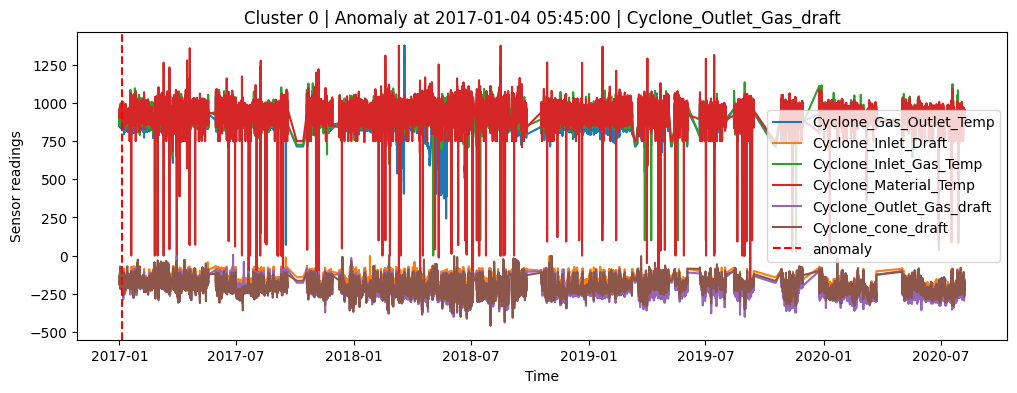

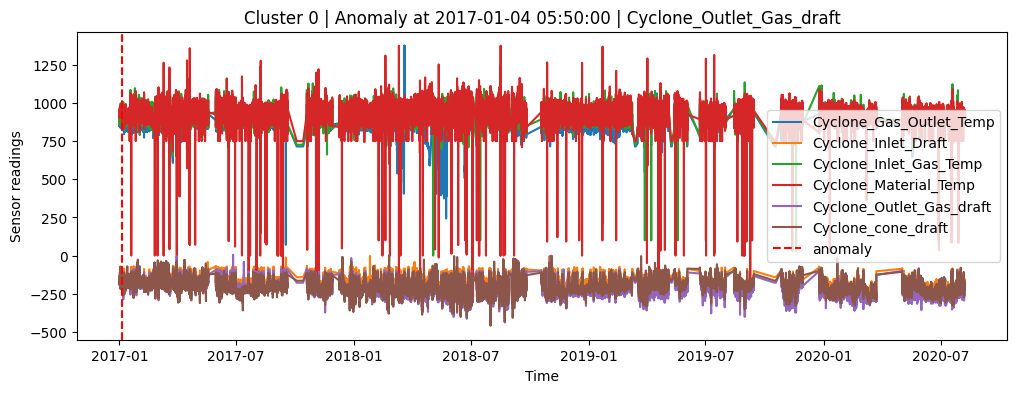

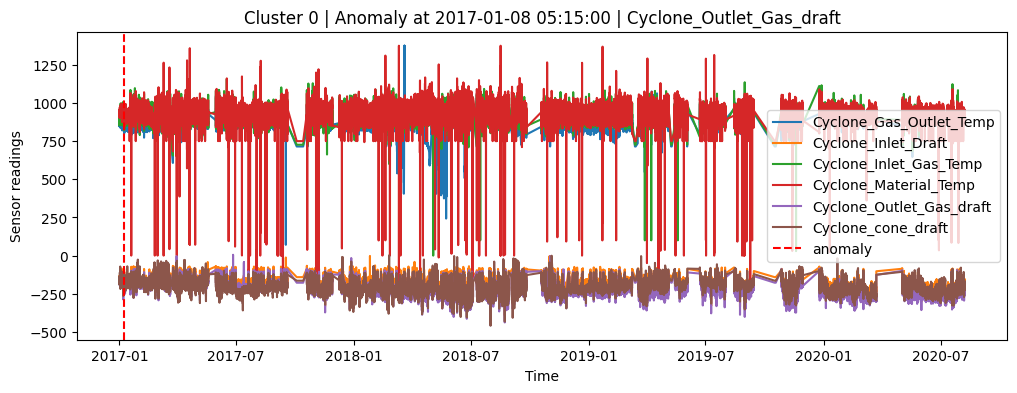

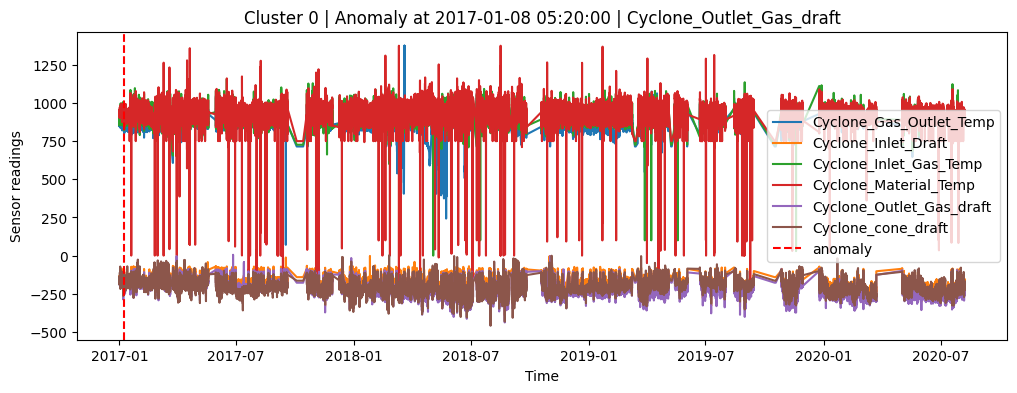

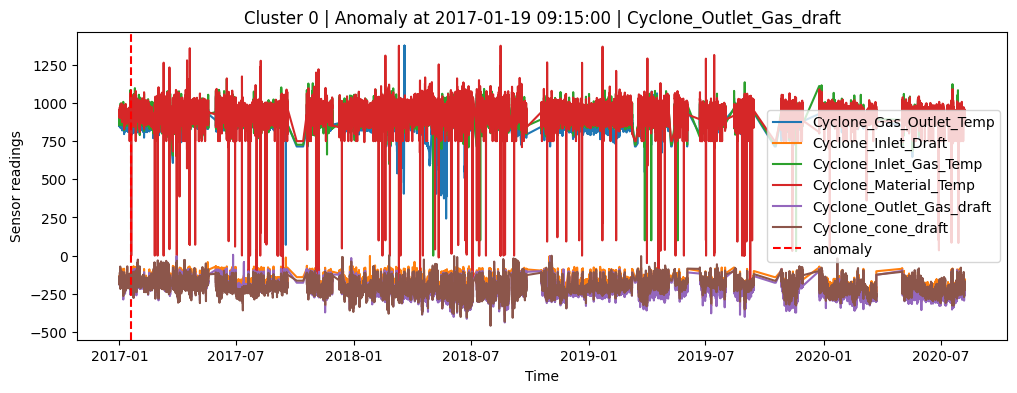

In [43]:
selected = root_causes_df.head(5)  # pick 5 interesting anomalies
for _, row in selected.iterrows():
    cluster_data = df[df['state'] == row['cluster']]
    plt.figure(figsize = (12,4))
    for s in sensors:
        plt.plot(cluster_data['time'], cluster_data[s], label=s)
    # highlight anomaly
    plt.axvline(x=row['time'], color='r', linestyle='--', label='anomaly')
    plt.title(f"Cluster {row['cluster']} | Anomaly at {row['time']} | {row['most_implicated_sensor']}")
    plt.xlabel('Time')
    plt.ylabel('Sensor readings')
    plt.legend()
    plt.show()

Now we export the detected anomalies data as a CSV file.

In [44]:
anomalies_df = anomalies_df.sort_values(['state', 'time'])

records = []

for cluster in anomalies_df['state'].unique():
    cluster_data = anomalies_df[anomalies_df['state'] == cluster]
    sensors = df.columns.difference(['time','state'])
    
    for sensor in sensors:
        sensor_anomalies = cluster_data[cluster_data['anomaly'] == 1][['time', sensor]]
        if sensor_anomalies.empty:
            continue
        
        times = sensor_anomalies['time'].tolist()
        start = times[0]
        prev = times[0]
        
        for t in times[1:] + [None]:  
            if t is None or (t - prev).total_seconds() > 1:  # assuming 1-sec interval, adjust if needed
                end = prev
                duration = (end - start).total_seconds()
                records.append({
                    'state': cluster,
                    'variables': sensor,
                    'time': start,
                    'duration': duration
                })
                if t is not None:
                    start = t
            prev = t

anomalous_periods_df = pd.DataFrame(records)
anomalous_periods_df.to_csv('anomalous_periods.csv', index=False)
print("CSV saved.")

CSV saved.


---

### 5. Short-Horizon Forecasting 

In [45]:
df = pd.read_excel("data.xlsx")

for col in df.columns:
    if df[col].dtype == 'object' and col != "time":
        df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.fillna(method = "ffill")

In [46]:
target = "Cyclone_Inlet_Gas_Temp"
y = df[target].values

train, test = y[:-12], y[-12:] # last 12 steps for testing

# persistence baseline (last value carried forward)
pred_persistence = np.repeat(train[-1], len(test))

# ARIMA
model = ARIMA(train, order = (2, 1, 2))
fitted = model.fit()
pred_arima = fitted.forecast(steps = len(test))

In [49]:
def evaluate(true, pred, name):
    rmse = root_mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    print(f"{name} | RMSE: {rmse:.2f}, MAE: {mae:.2f}")

evaluate(test, pred_persistence, "Persistence baseline")
evaluate(test, pred_arima, "ARIMA")

Persistence baseline | RMSE: 14.16, MAE: 11.58
ARIMA | RMSE: 8.25, MAE: 6.57


Now we export the forecast data as a CSV file.

In [50]:
forecast_df = pd.DataFrame({
    'time': df['time'].iloc[-12:],
    'true': test,
    'pred_persistence': pred_persistence,
    'pred_arima': pred_arima
})

forecast_df.to_csv('forecasts.csv', index=False)
print("CSV saved.")

CSV saved.


---

### 6. Insights & Storytelling

>##### Key Insights

##### 1. Cluster-Specific Behavior
- **Cluster 0:** Dominates normal operations with high Cyclone Inlet Gas Temp (~892°C) and minimal volatility (std ~29).  
- **Cluster 1:** Represents low-temperature, highly variable periods, indicating inactive states.  
- **Cluster 2:** Captures intermediate/high-temperature, highly volatile states, suggesting transitional periods.

##### 2. Shutdown Correlation
- Short-duration shutdowns (0.17–0.5 hr) often occur during **Cluster 1 / 2** states, when temperature and draft readings are more variable.  
- Longer shutdowns (>1 hr) tend to follow periods where **Cluster 2** readings indicate high variability from forecast values.

##### 3. Forecast Deviations as Early Signals
- **Persistence forecasts** lag the true values significantly during spikes (e.g., 908.5 vs 880.19).  
- **ARIMA forecasts** align closer but still miss rapid excursions.  
- Large deviations between true readings and forecasts in **Cyclone Inlet Gas Temp** often precede short shutdowns, making forecast residuals a good indicator of potential interruptions.

>##### Actionable Recommendations

##### 1. Real-Time Monitoring Rules
- Trigger alerts can be implemented if:  
  - **Cyclone Inlet Gas Temp** deviates above or below 20°C from ARIMA forecast.  
- More focus can be given on readings of **Cluster 1** ranges.  

##### 2. Operator Early Warning System
- Use rolling forecast residuals as an early-warning indicator for shutdowns.  

##### 3. Cluster-Specific Maintenance Planning
- Schedule inspections and preventive maintenance around **Cluster 1**.  
- As mentioned earlier, it will be good to review long-duration shutdowns to identify root causes (e.g., equipment wear, process bottlenecks).  

##### 4. Data Collection 
- Increase sampling frequency during **transitions between clusters**, especially for draft and inlet gas temperature sensors can be used to improve anomaly detection accuracy.  